
1. Use any dataset from https://archive.ics.uci.edu/datasets?
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

df.head()

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  ...  Attribute12 Attribute13  \
0        A75           4        A93        A101  ...         A121          67   
1        A73           2        A92        A101  ...         A121          22   
2        A74           2        A93        A101  ...         A121          49   
3        A74           2        A93        A103  ...         A122          45   
4        A73           3        A93        A101  ...         A124          53   

   Attribute14 Attribute15 Attribute16  Attribute17 Attribute18  Attribute19  \
0         A143        A152           2         A173           1         A192   
1         A143        A152           1         A173           1         A191   
2         A143        A152           1         A172           2         A191   
3         A143        A153           1         A173           2         A191   
4         A143        A153           2         A173           2         A191   

  Attribute20 class  
0        A201     1  
1        A201     2  
2        A201     1  
3        A201     1  
4        A201     2  

[5 rows x 21 columns]

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

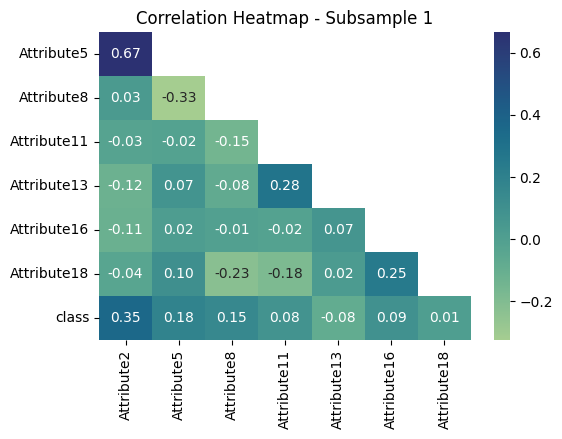

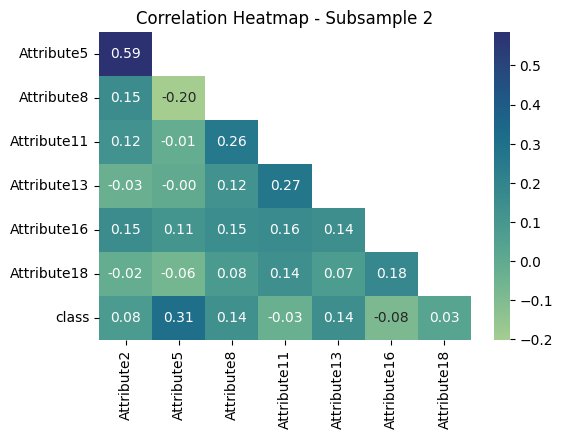

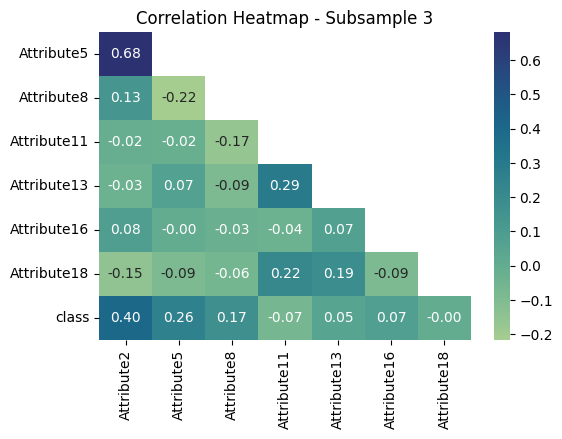

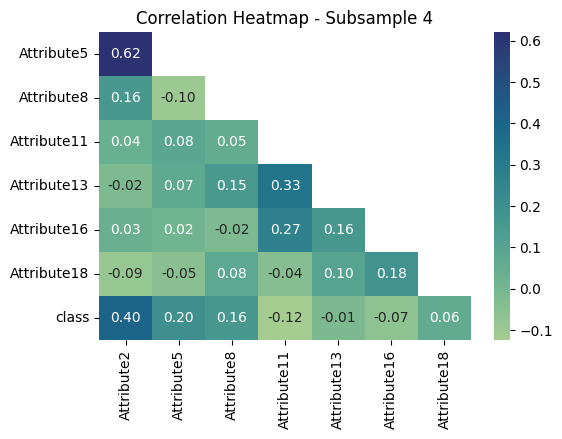

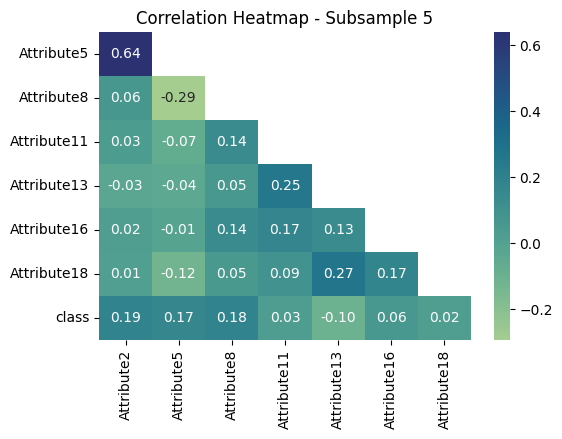

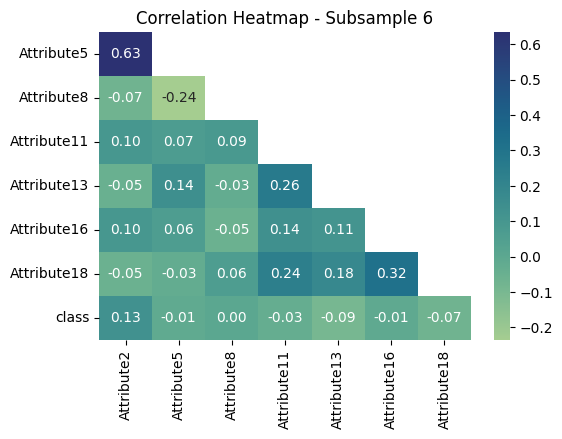

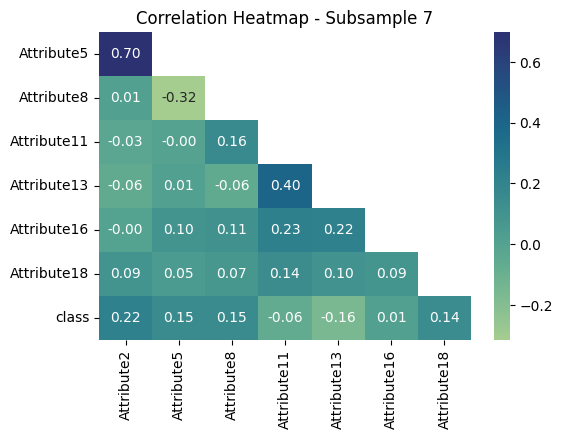

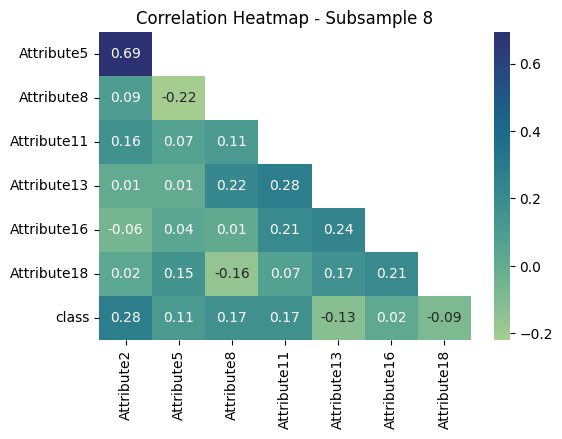

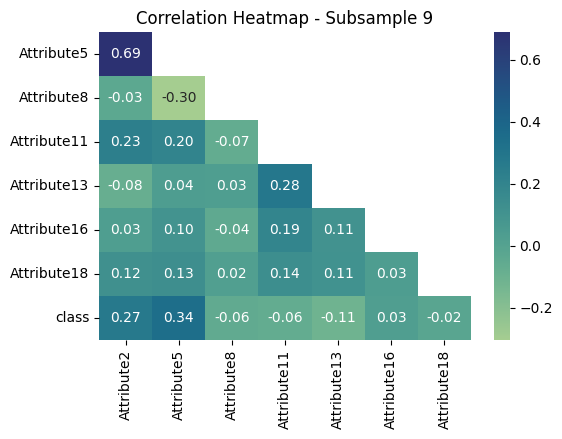

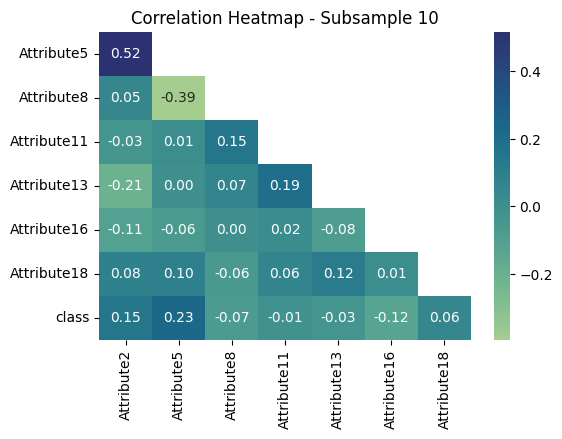

In [8]:
# Drop rows with non-numeric values
df_numeric = df.dropna().select_dtypes(include=[np.number])

# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(df_numeric) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(df_numeric.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = df_numeric.loc[subsample_indices]
    
    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()
    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    df_corr_viz = correlation_matrix.mask(mask).dropna(how='all').dropna(axis=1, how='all')
    # Plot the correlation heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_corr_viz, annot=True, cmap='crest', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced***

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'M'],
      dtype='object')


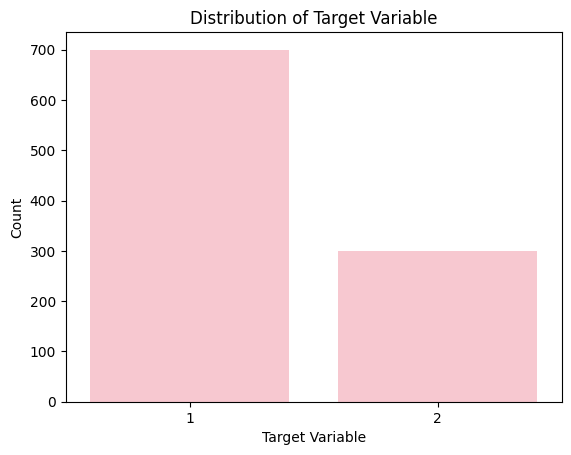

In [14]:
# Task is CLASSIFICATION

import matplotlib.pyplot as plt
import seaborn as sns
df.rename(columns={df.columns[-1]: 'M'}, inplace=True)

# Check the column names in your DataFrame
print(df.columns)

sns.countplot(x='M', data=df, color='pink')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

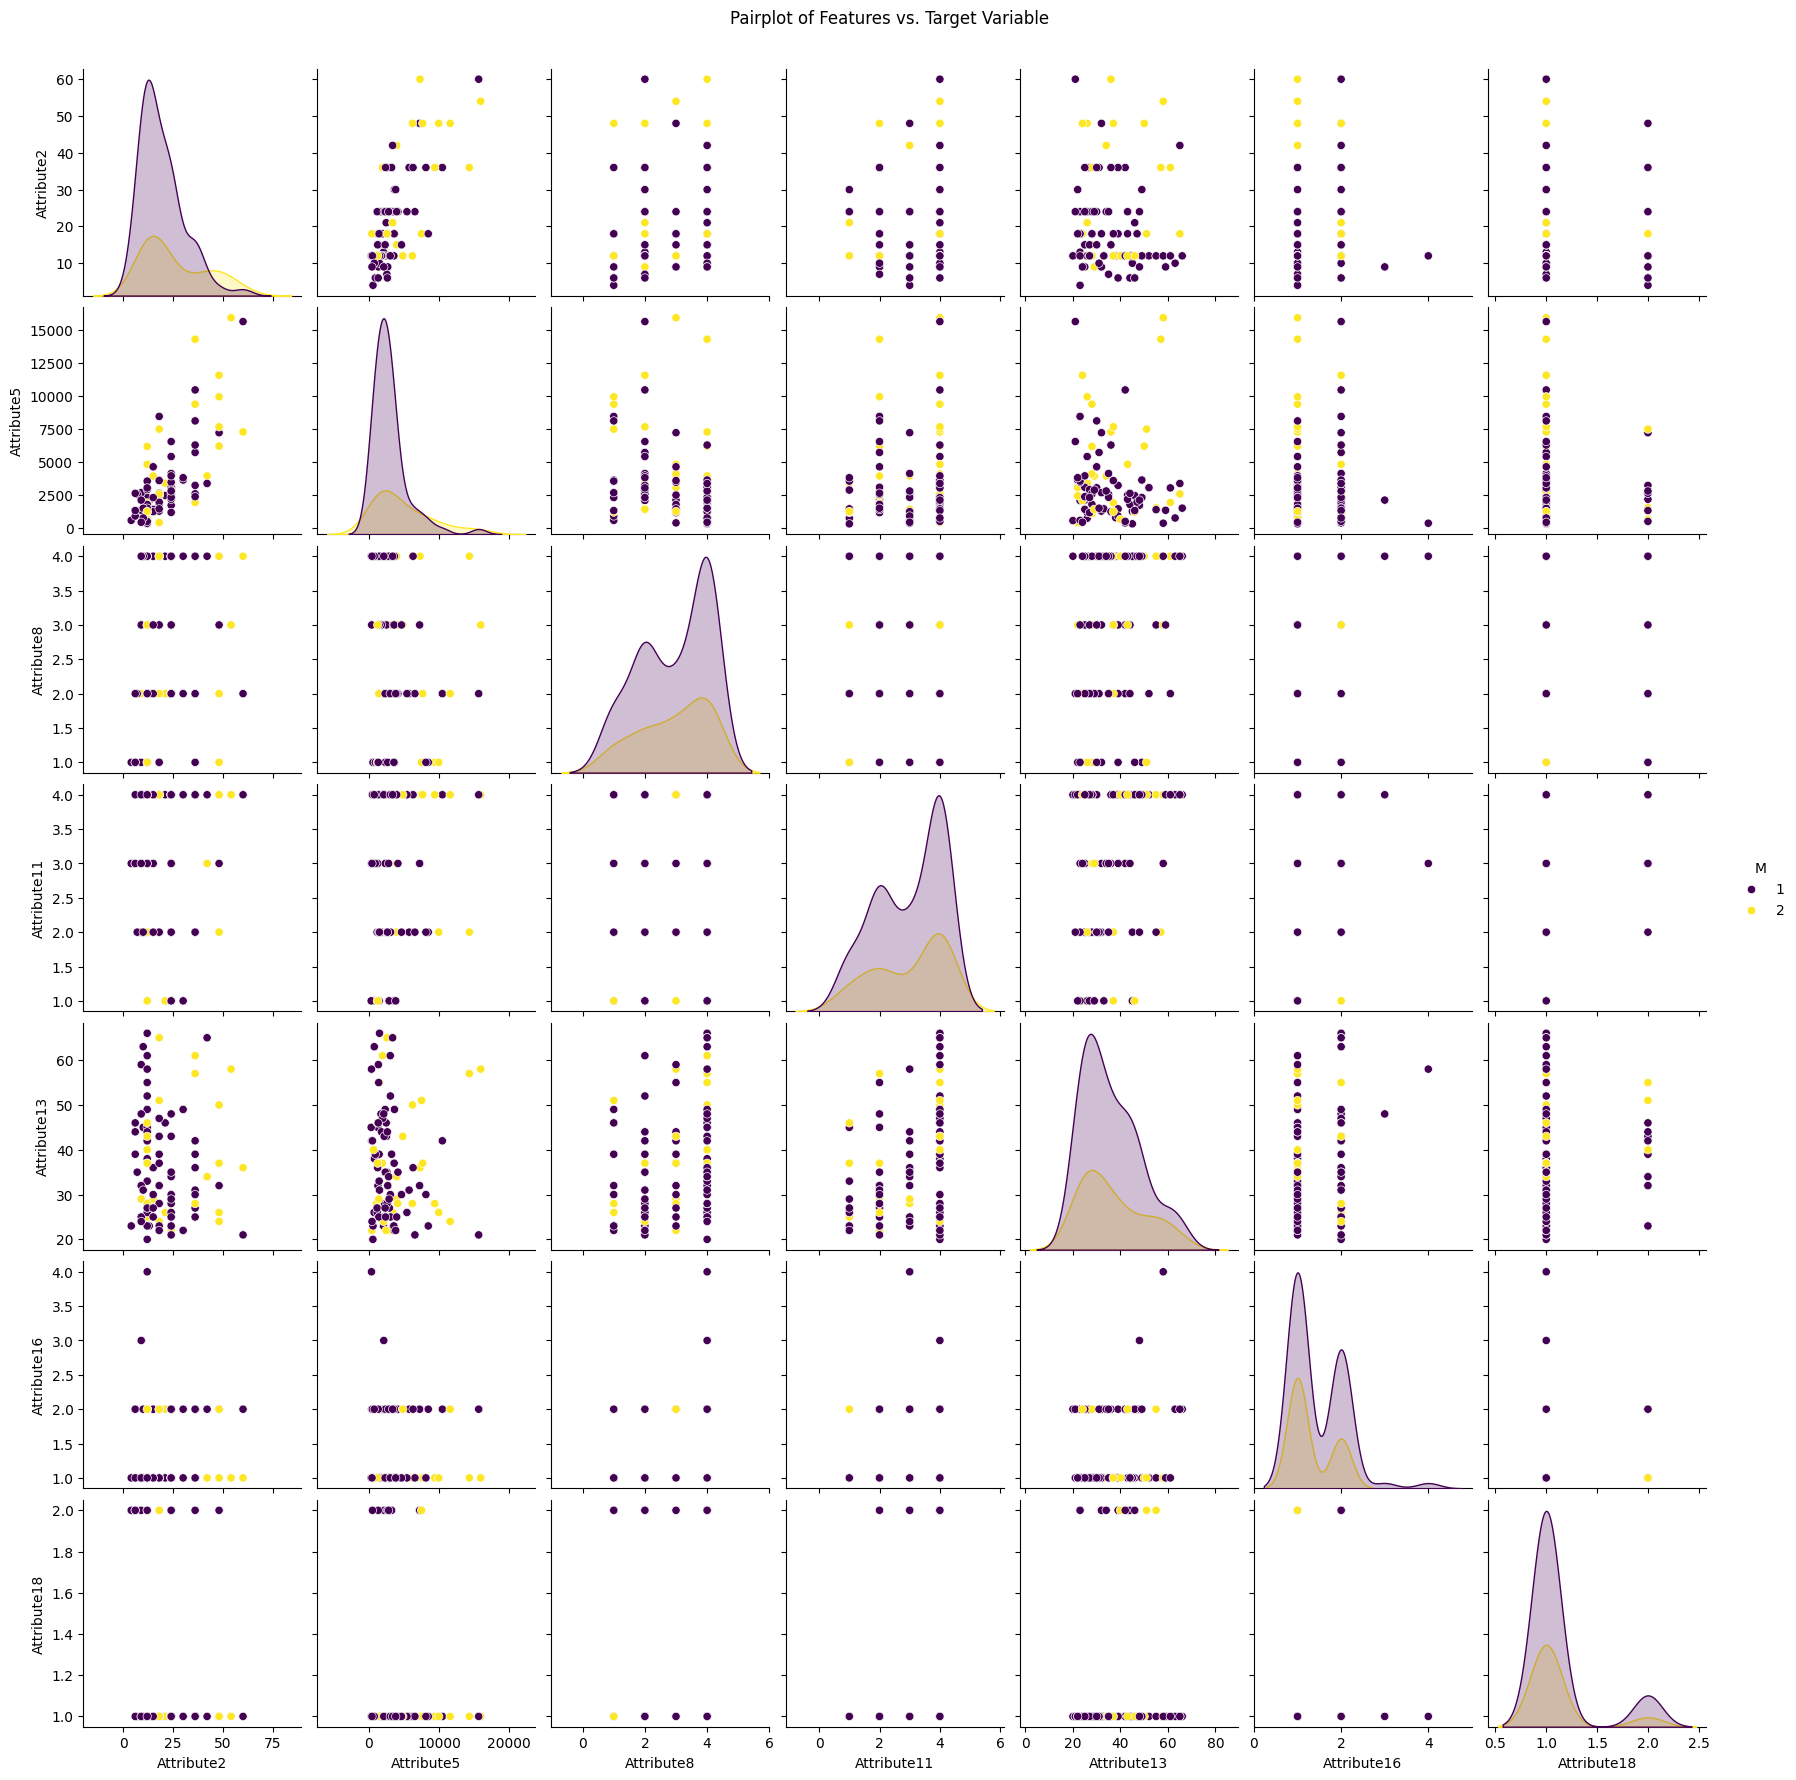

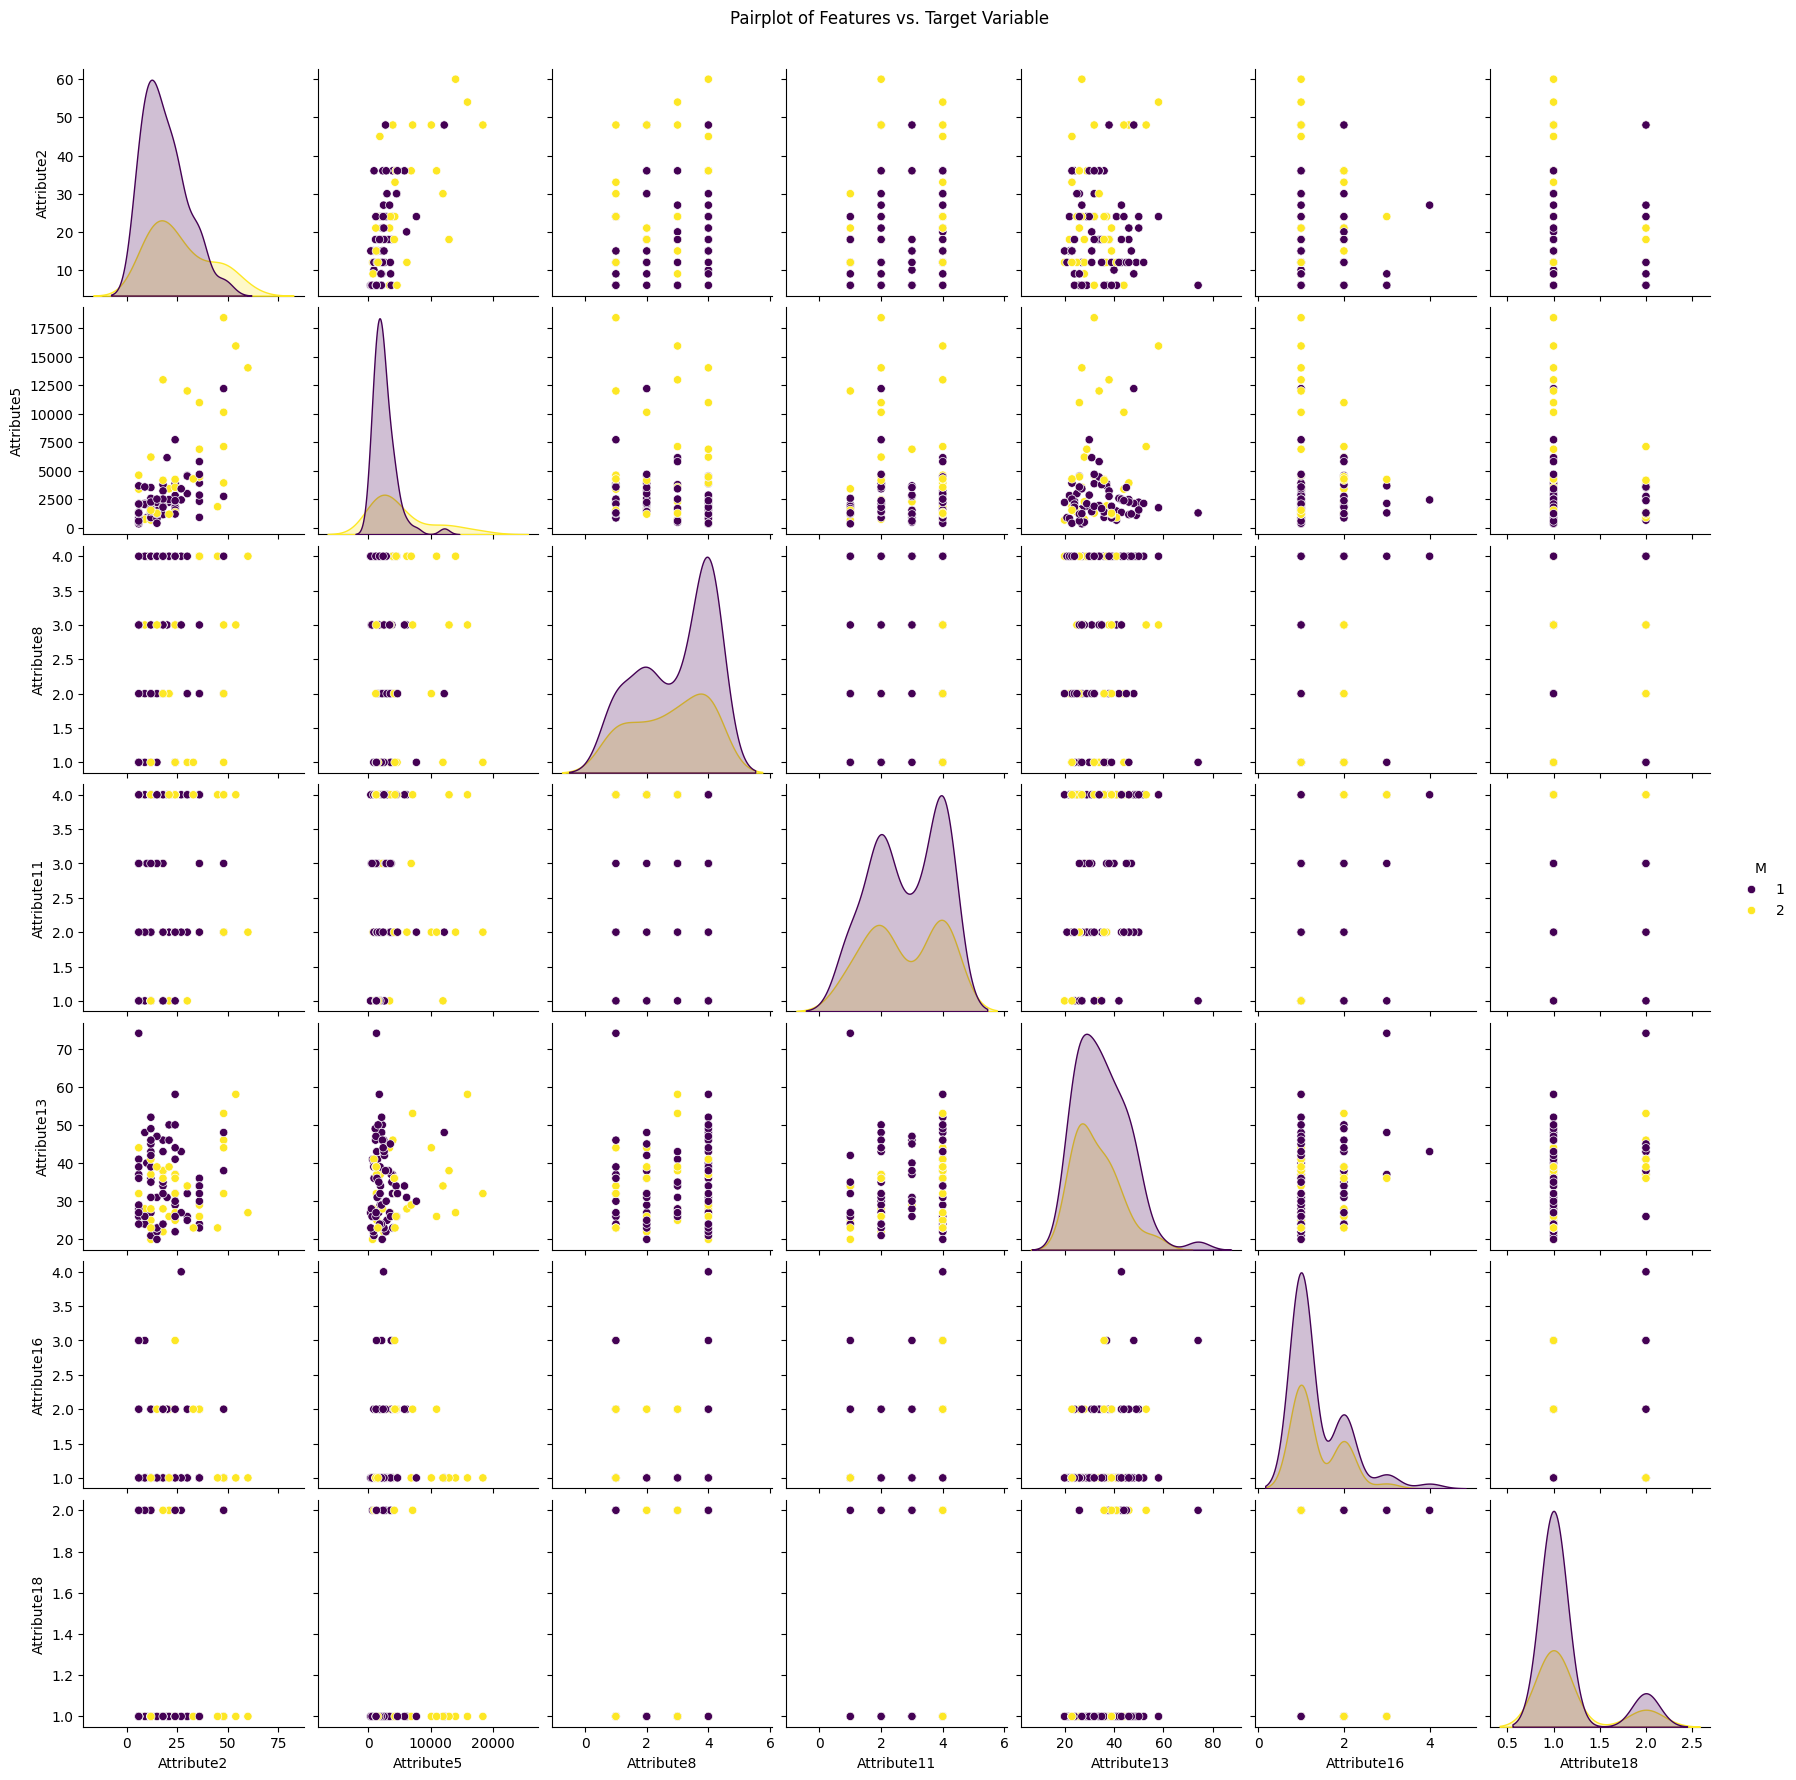

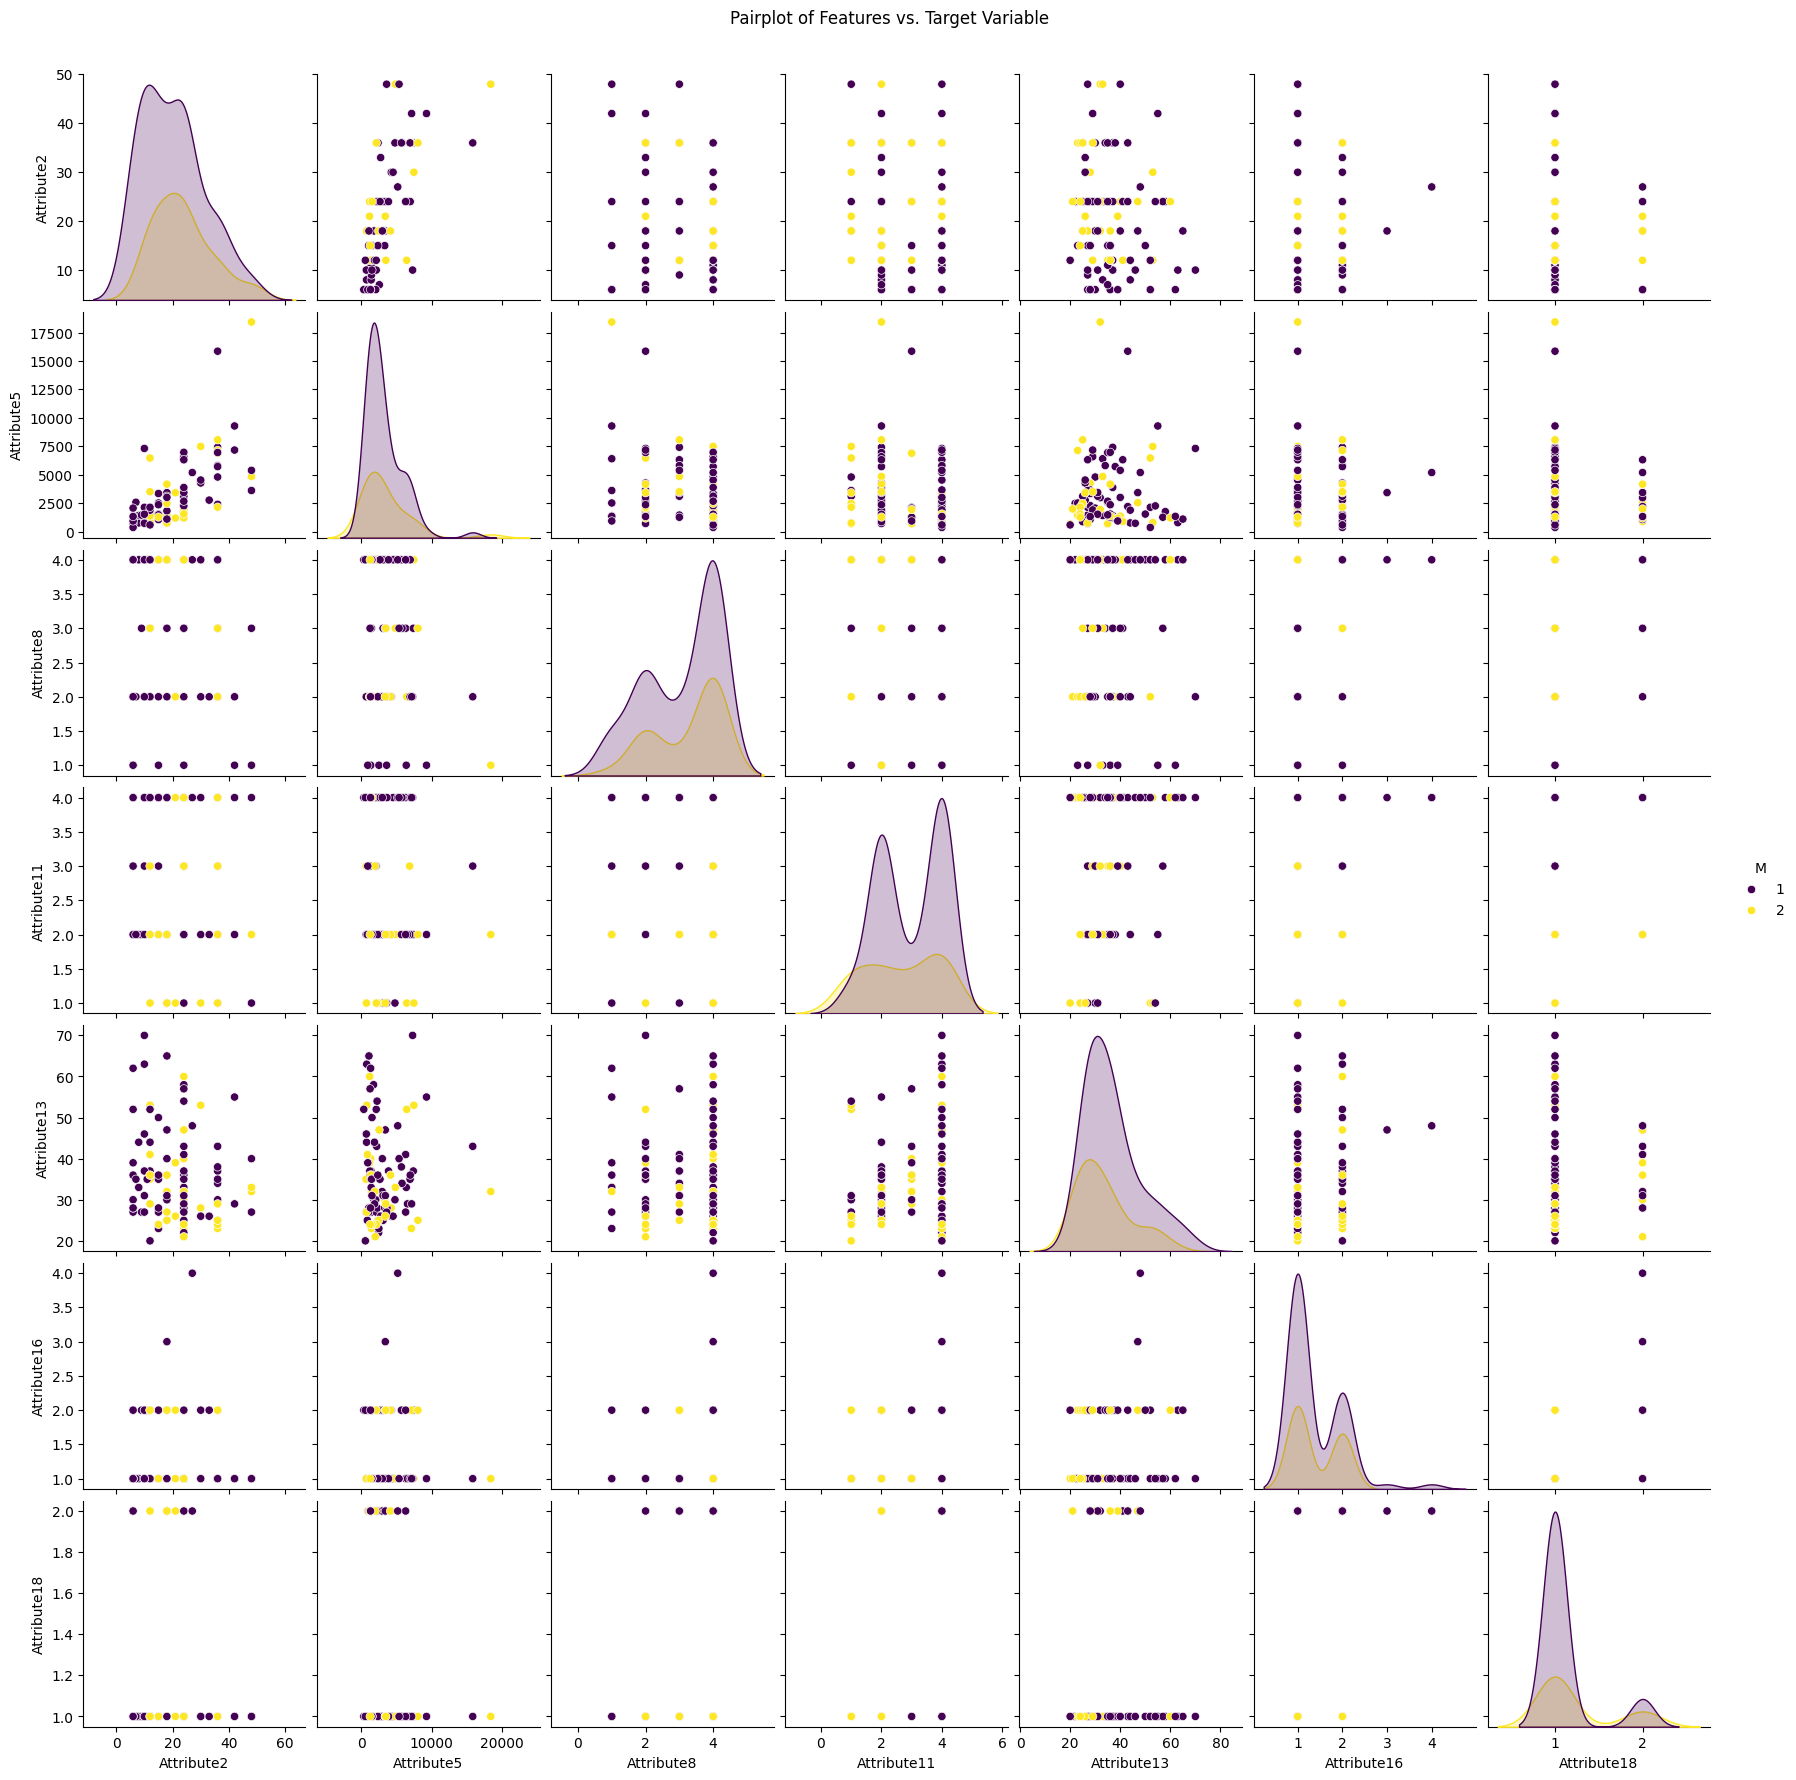

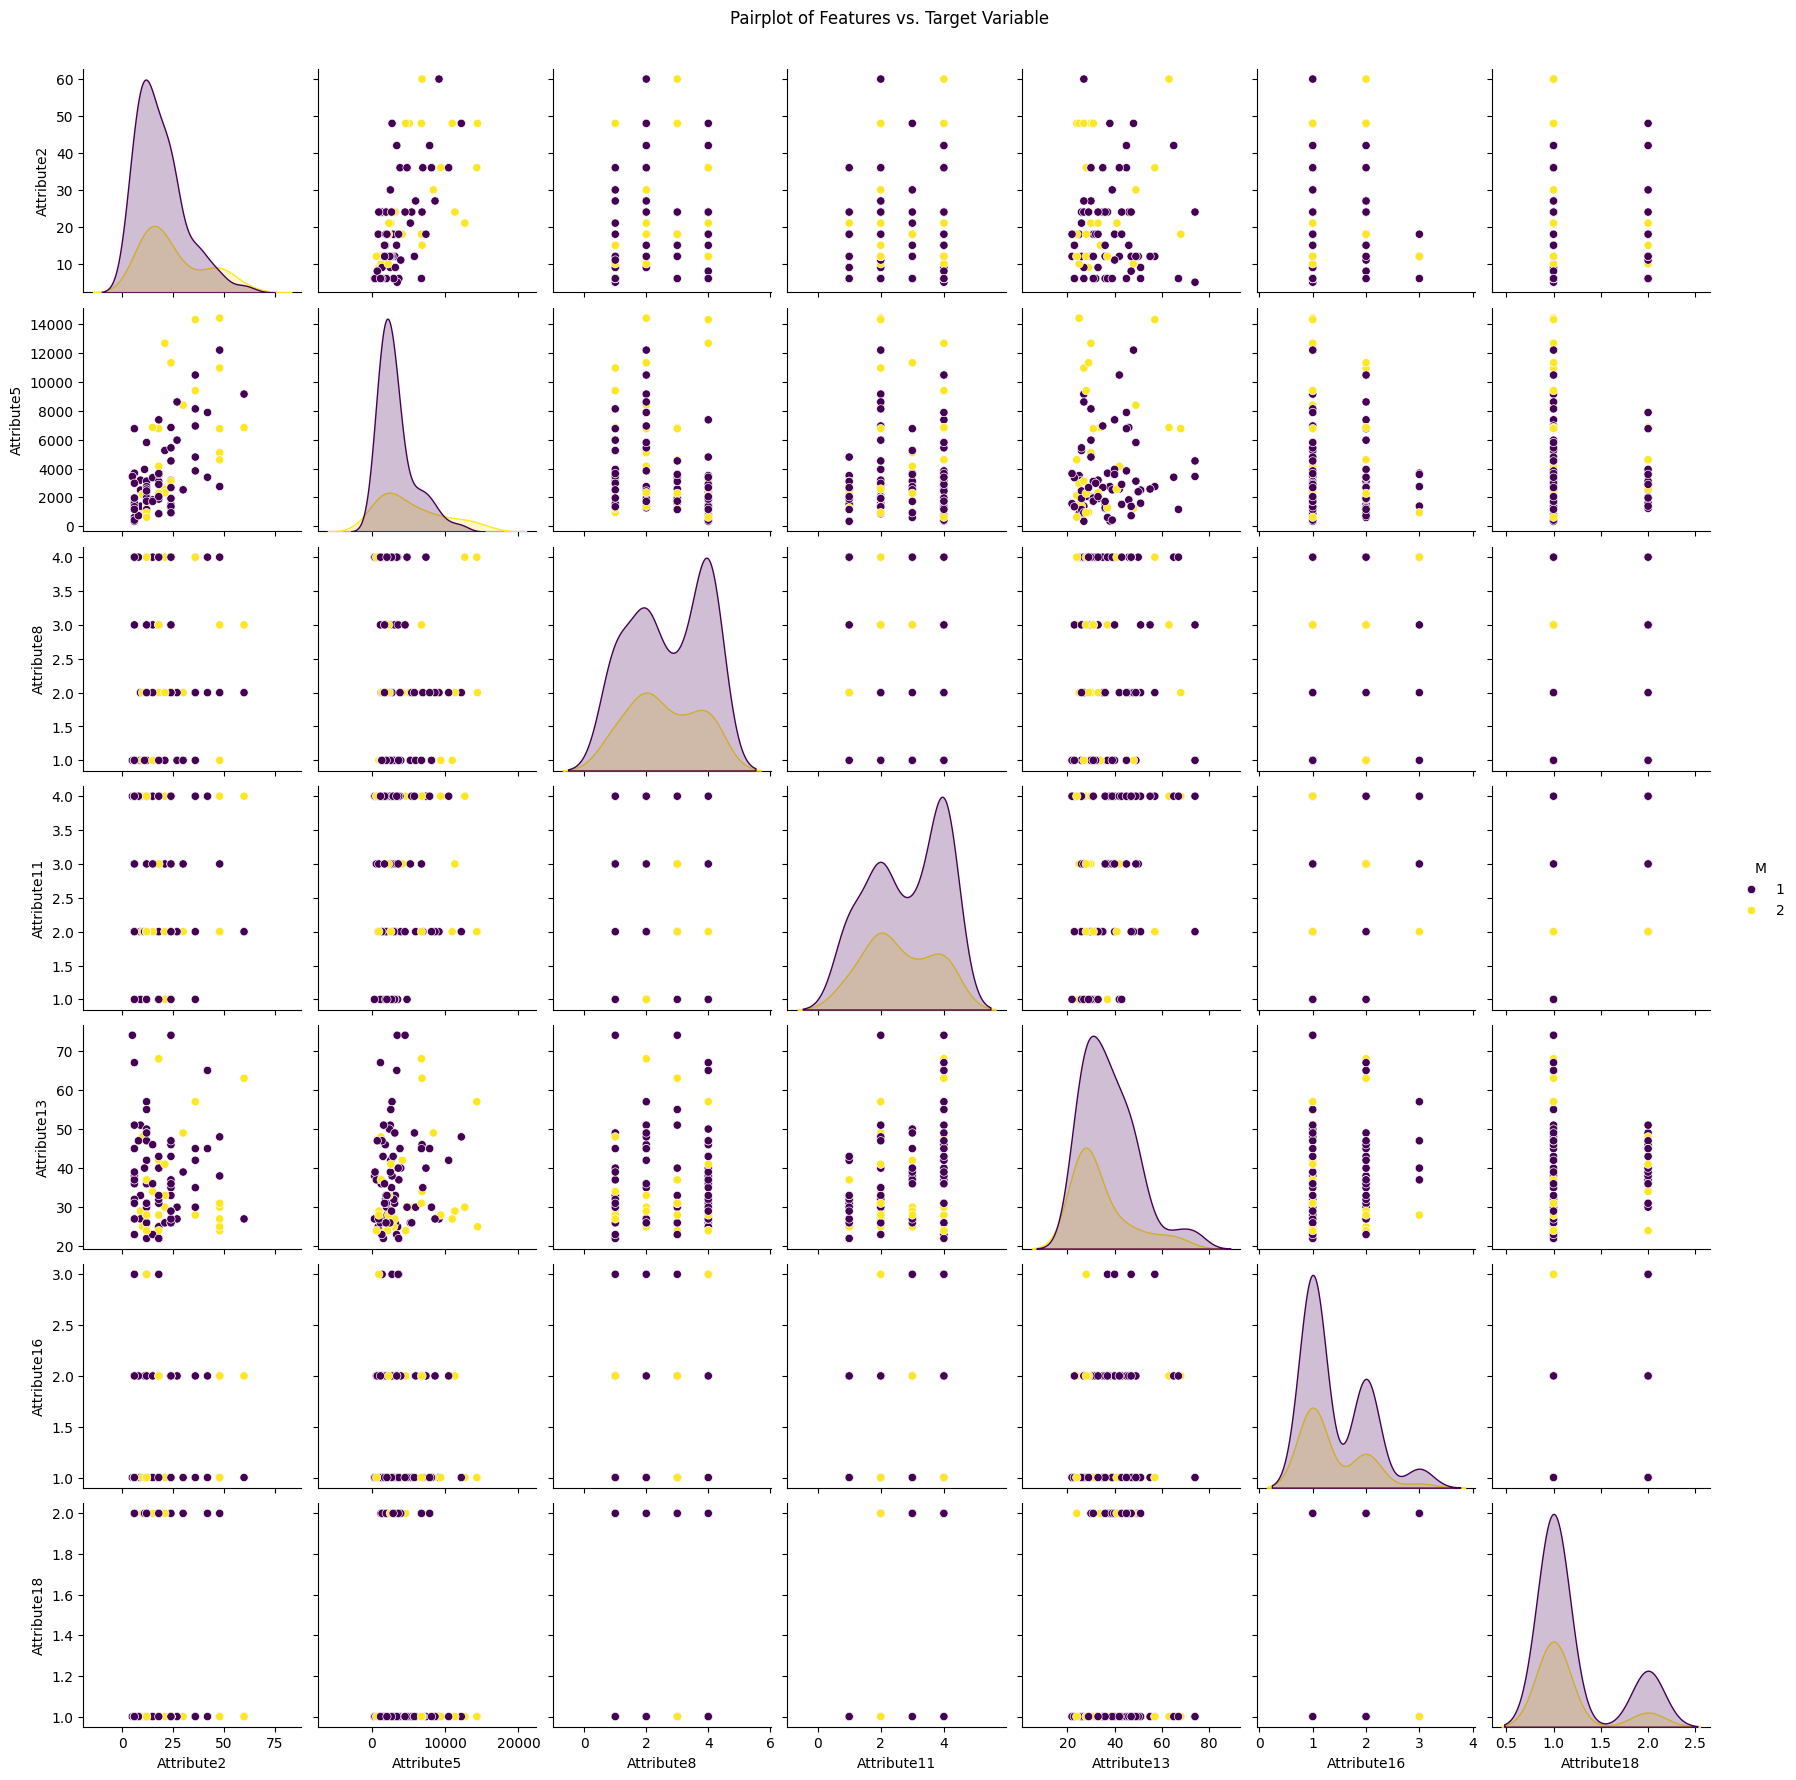

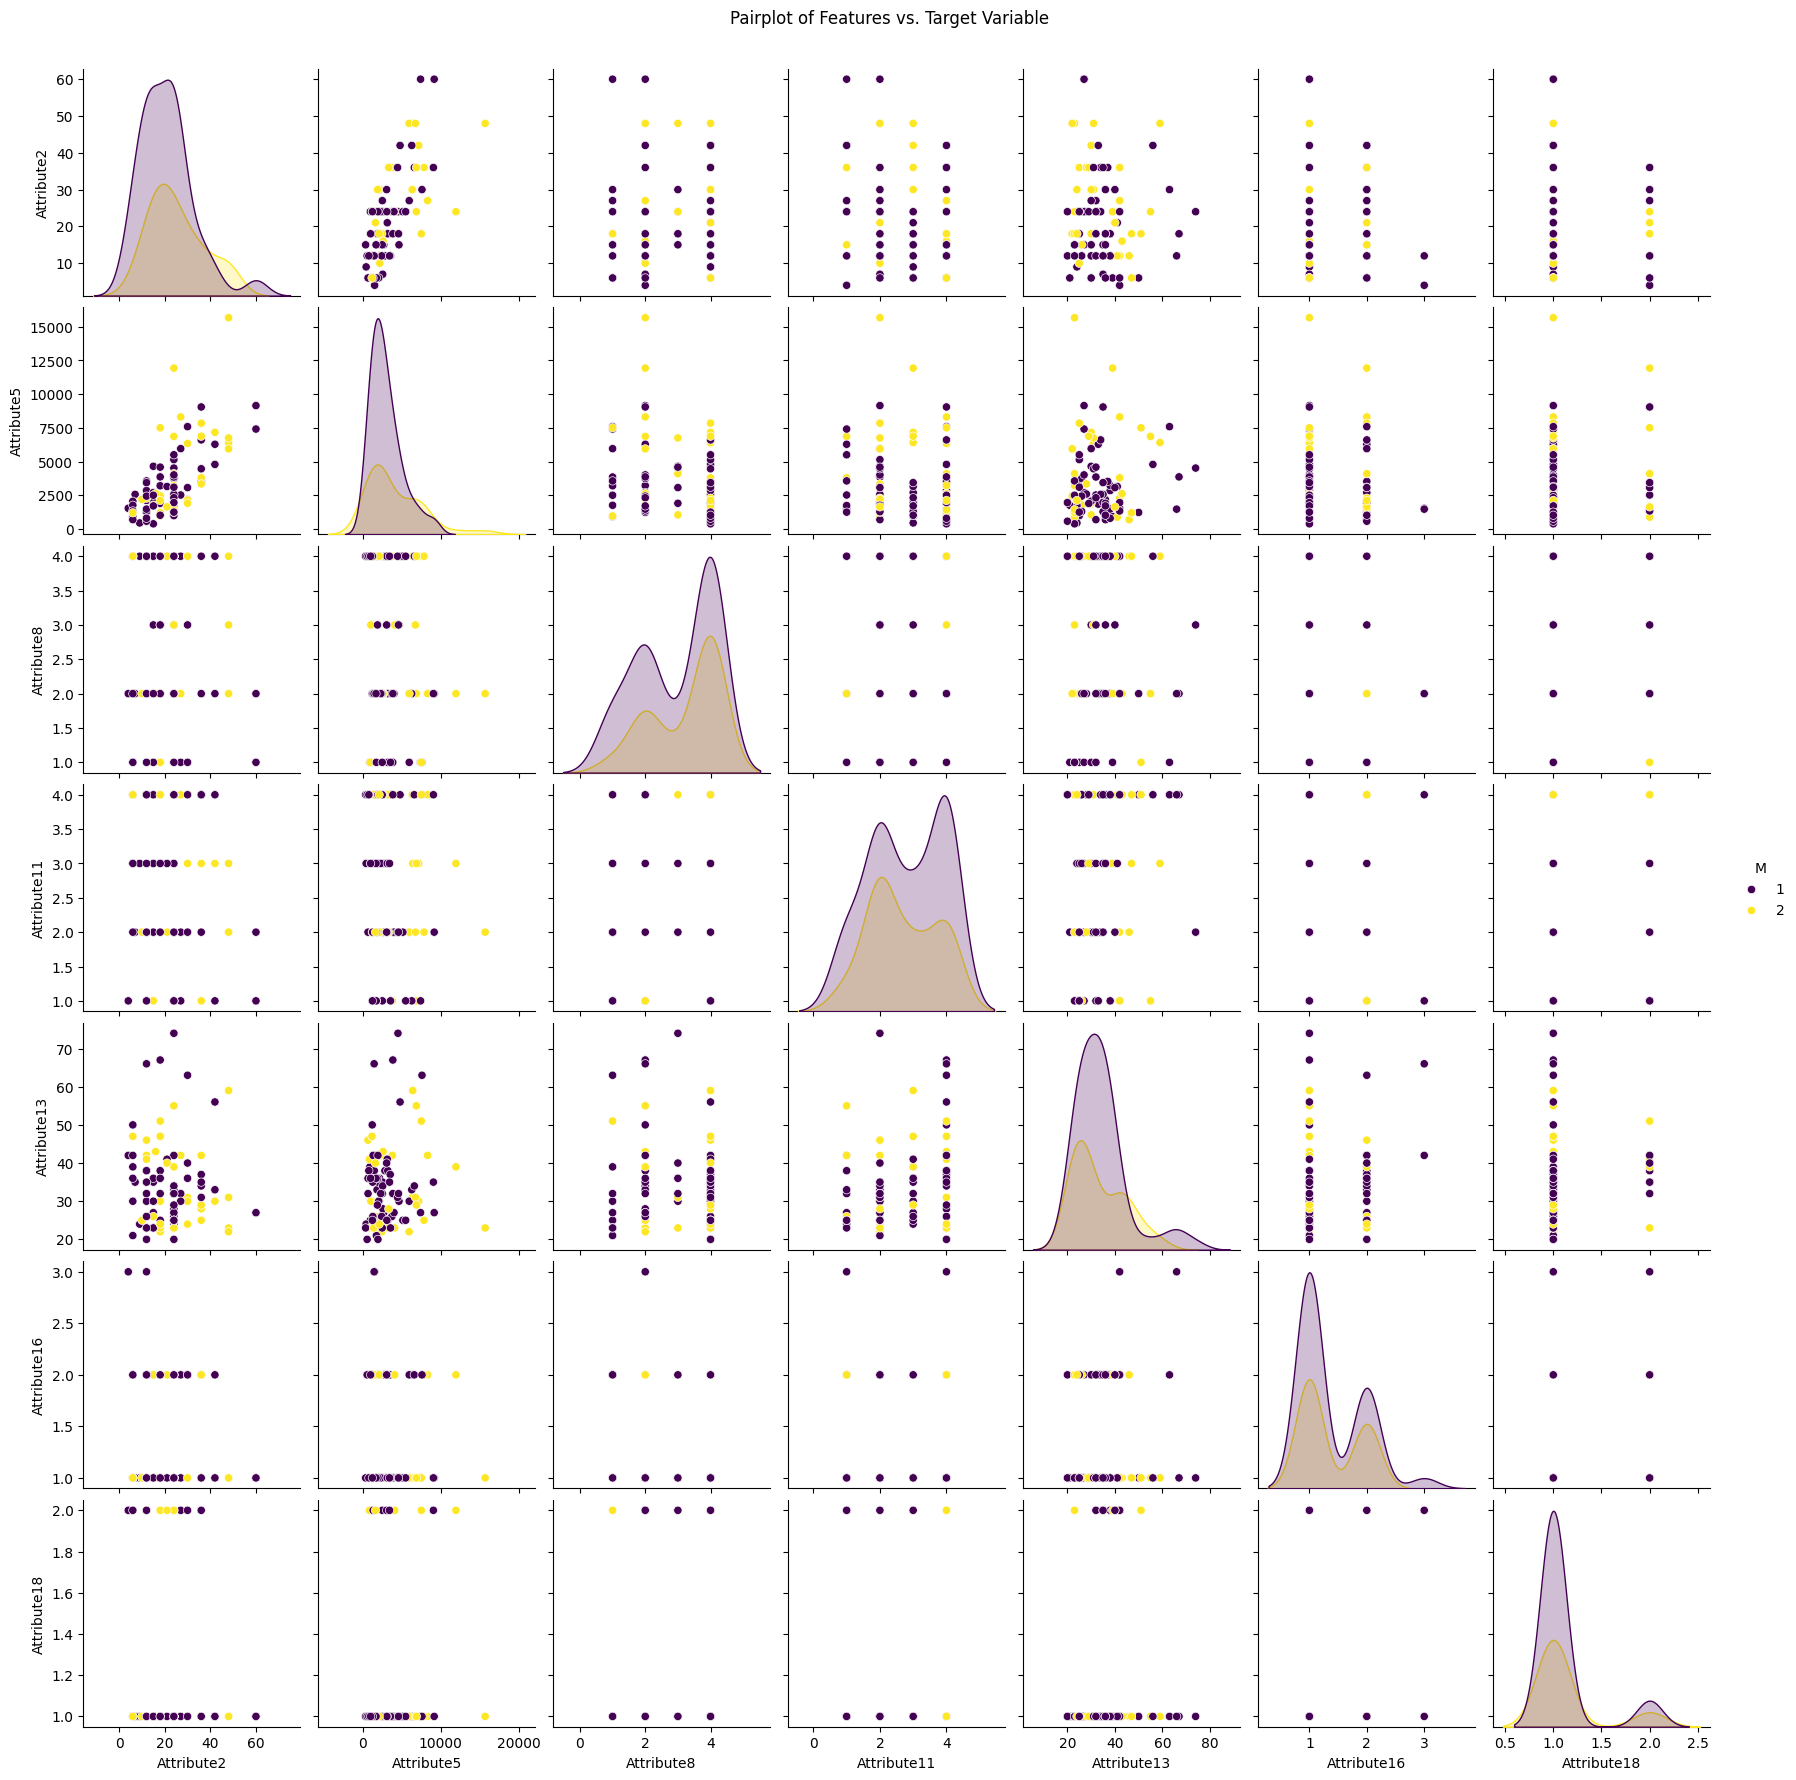

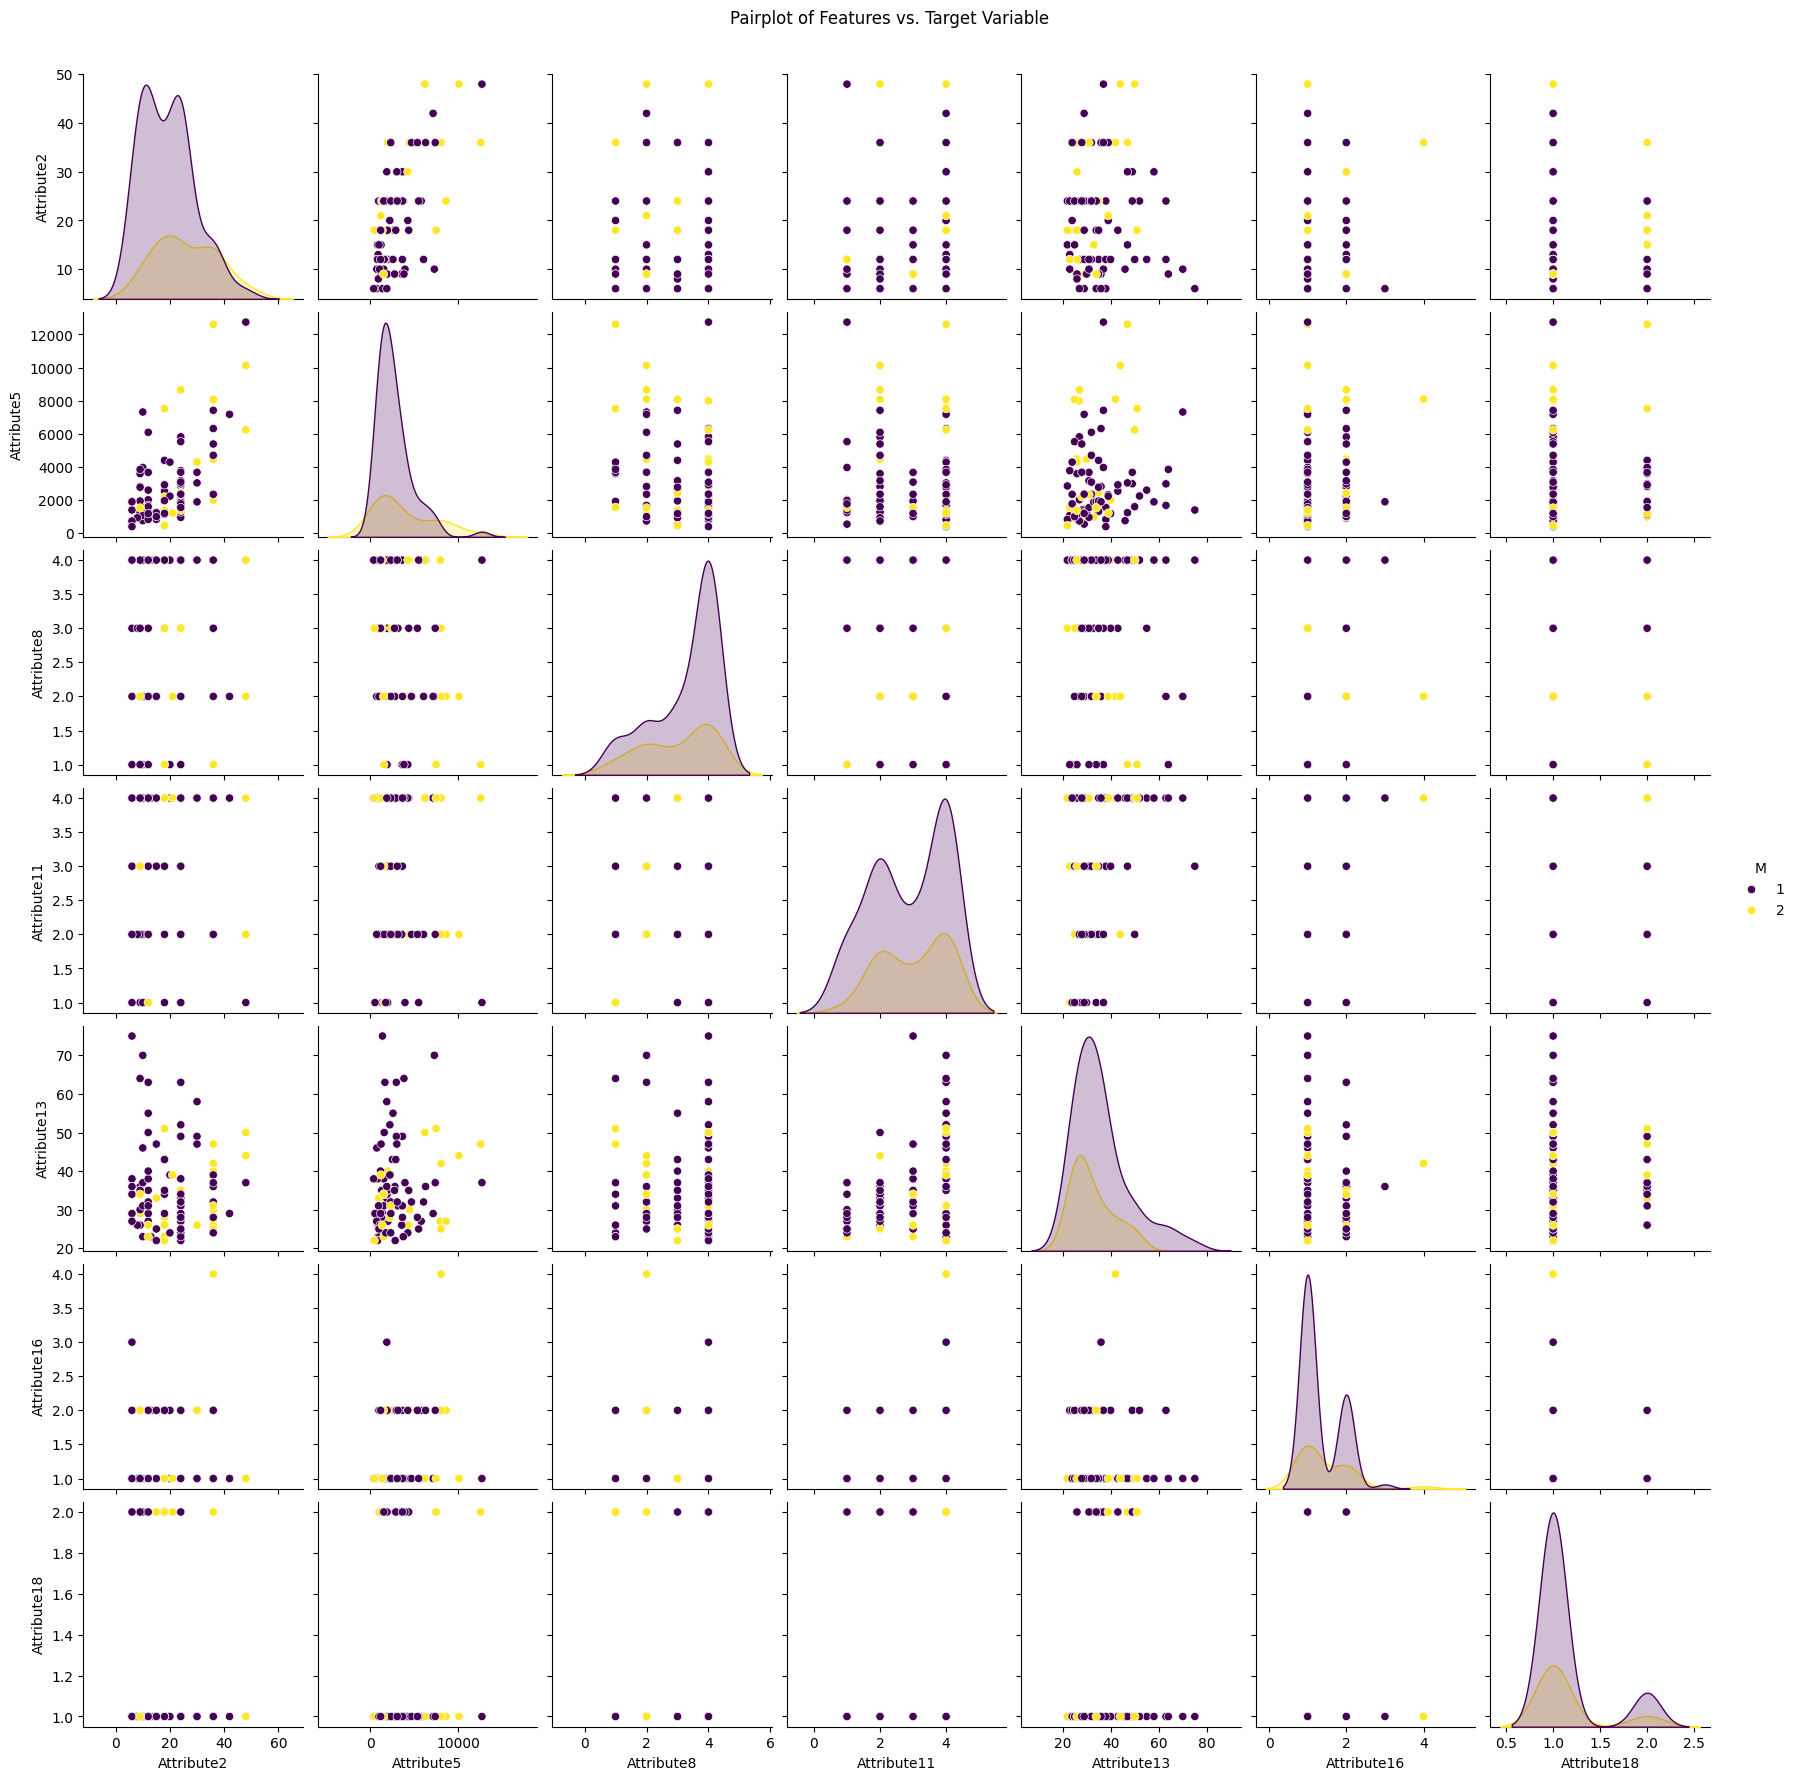

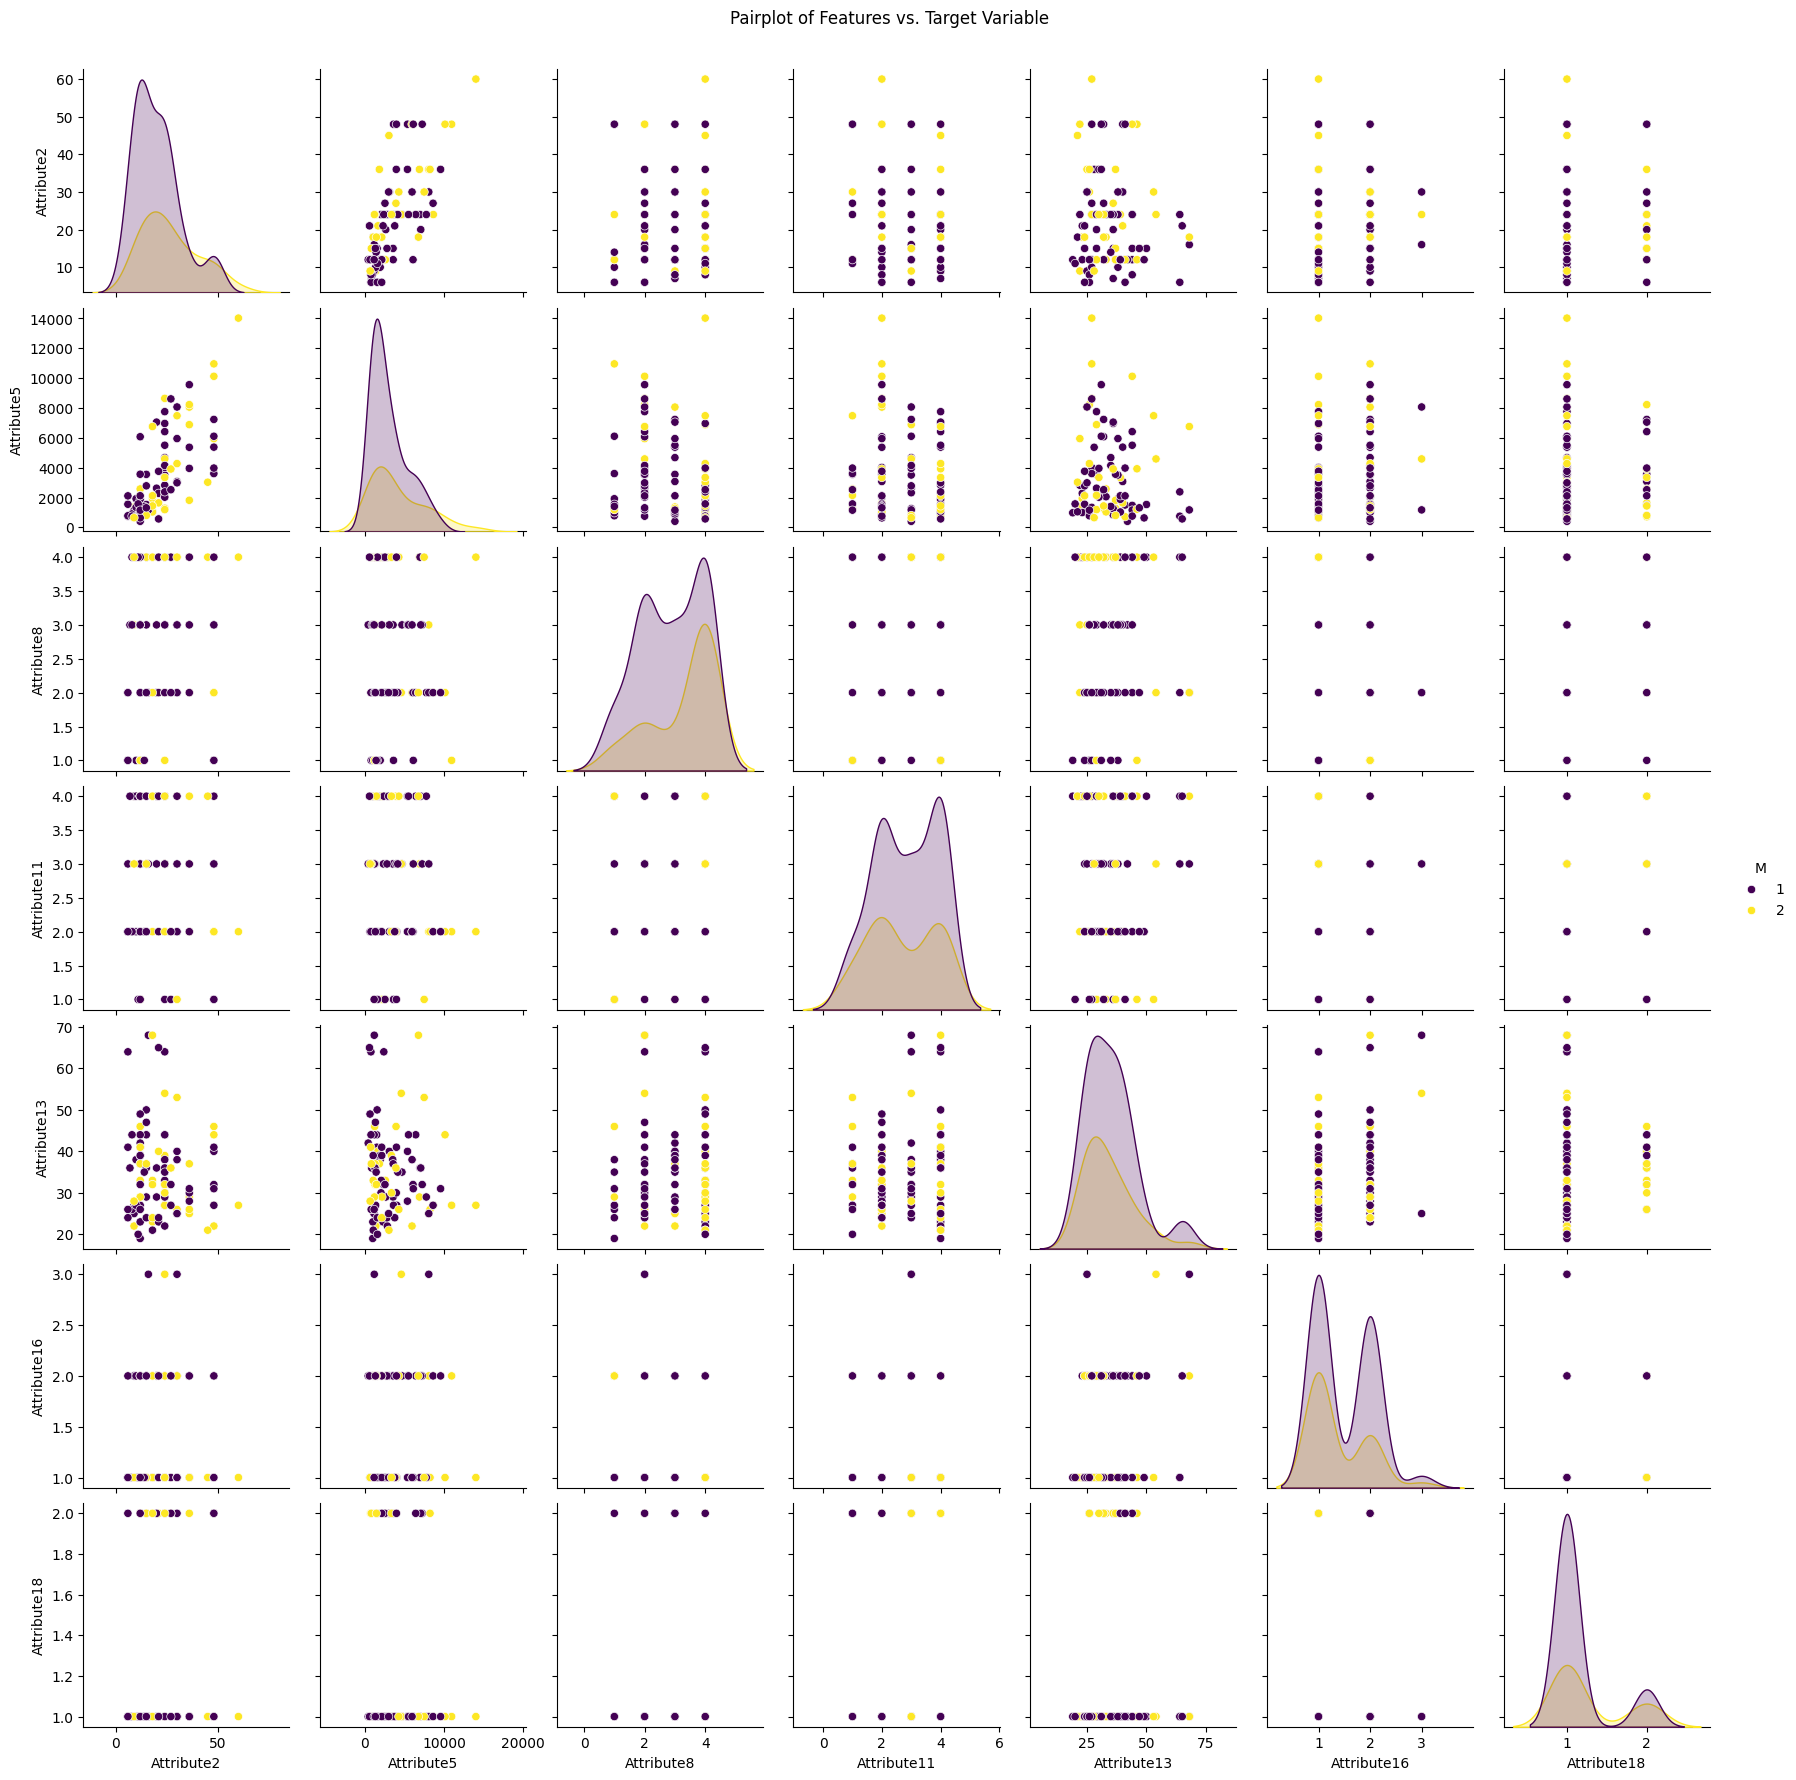

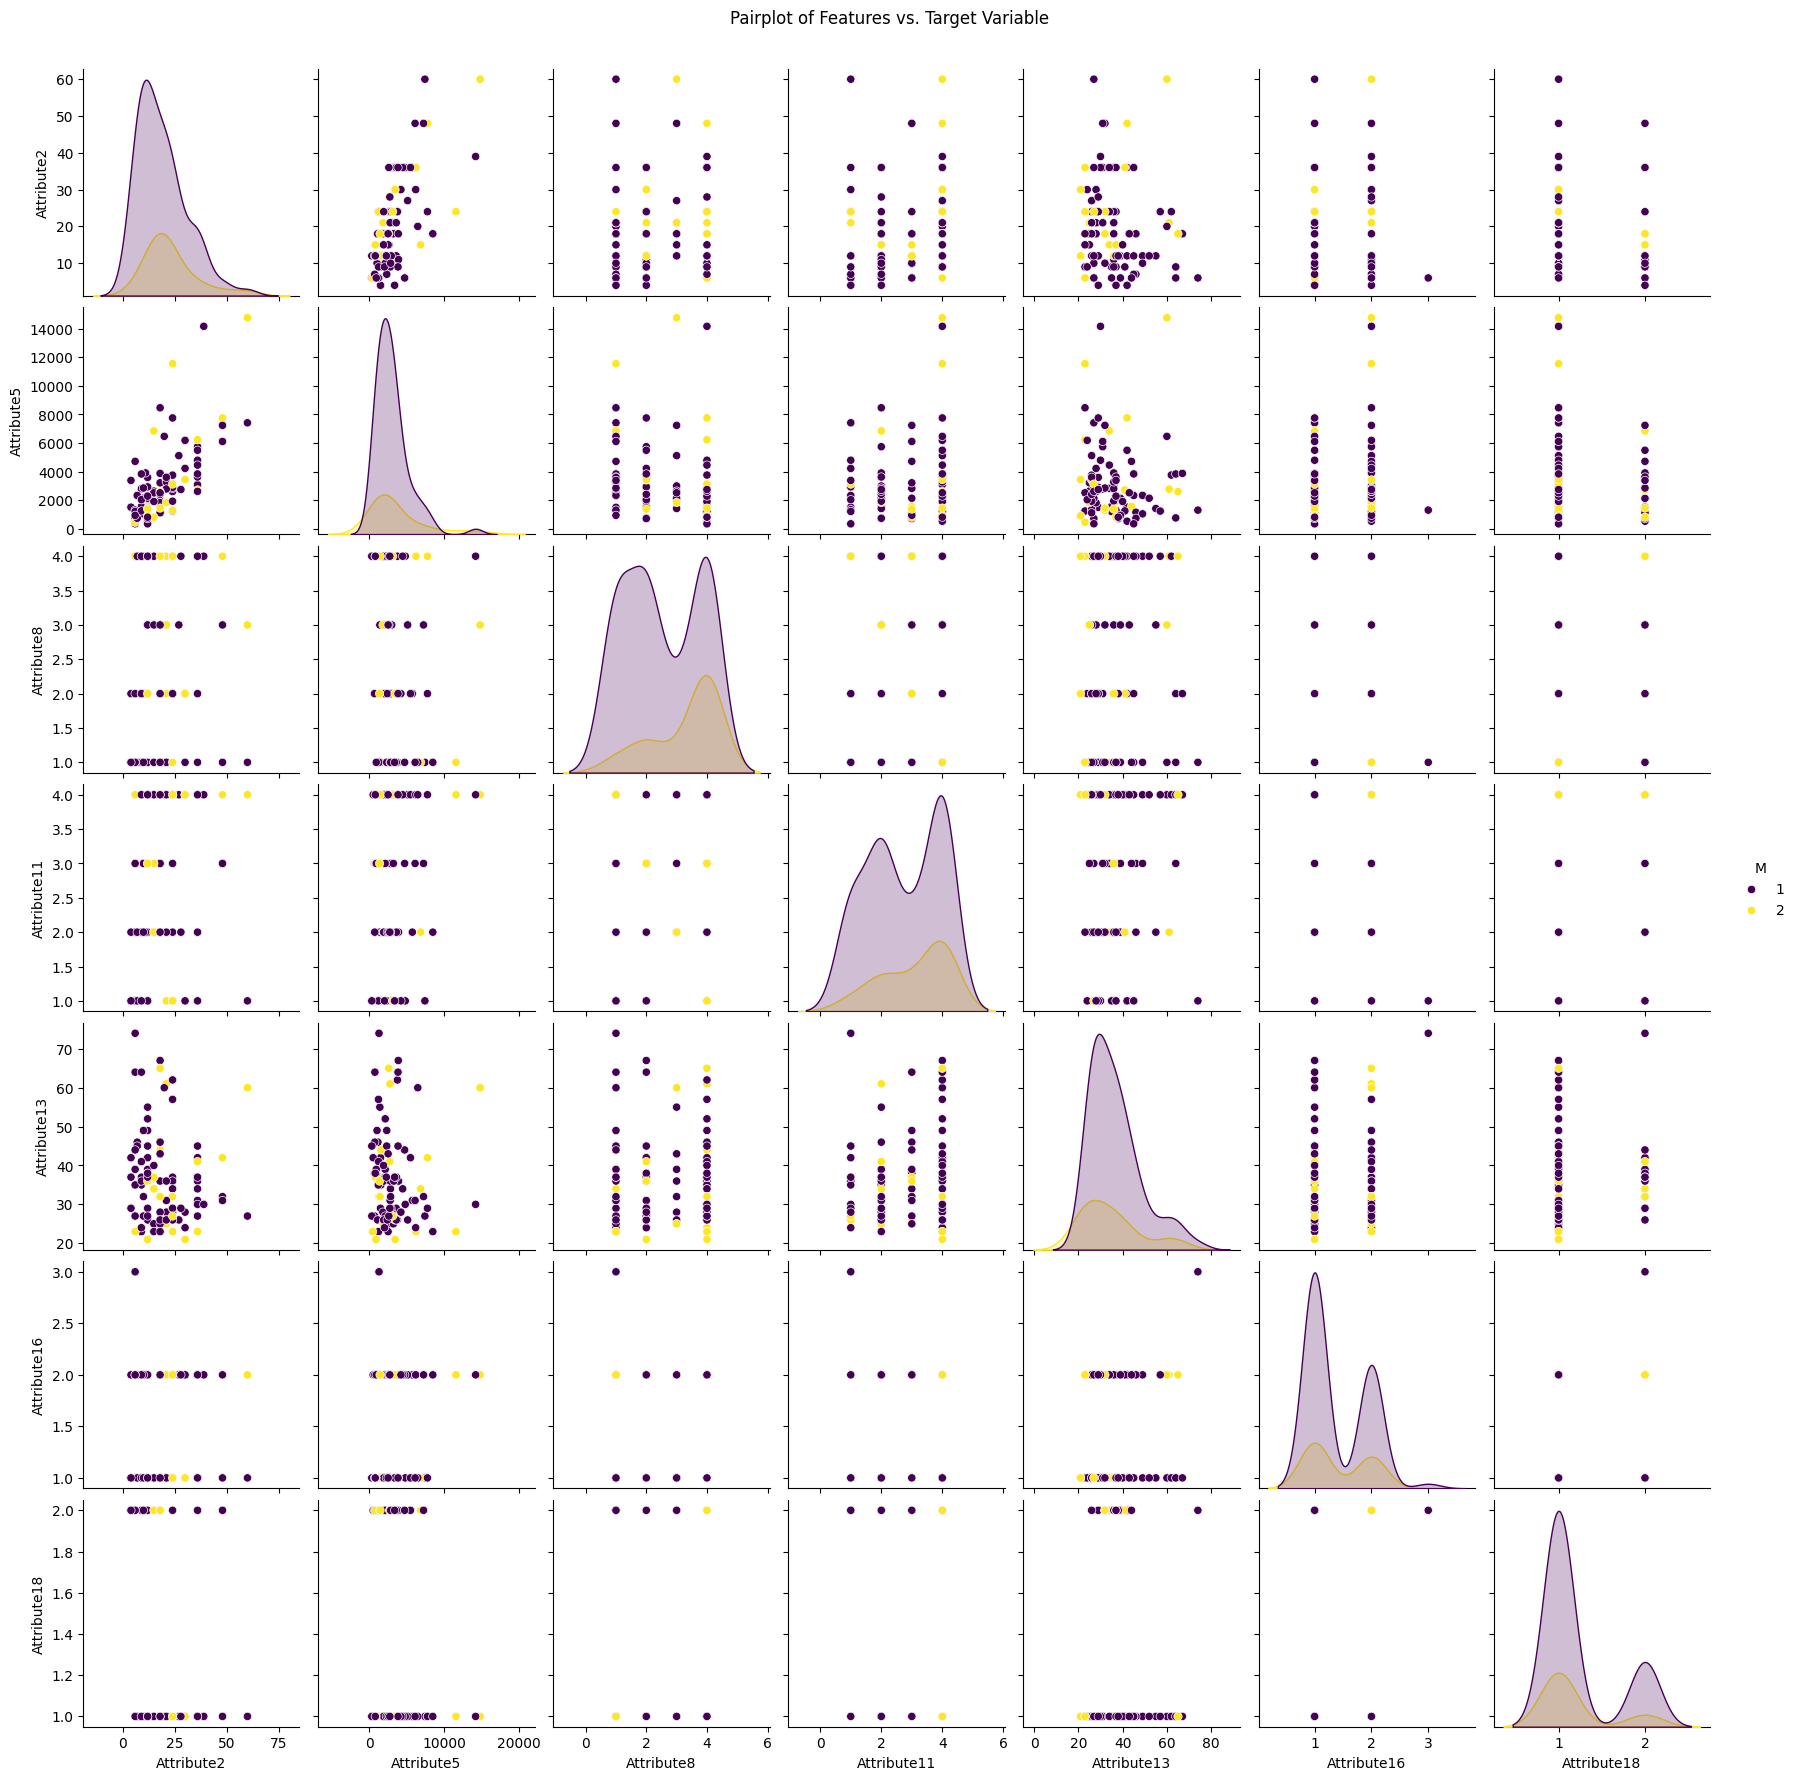

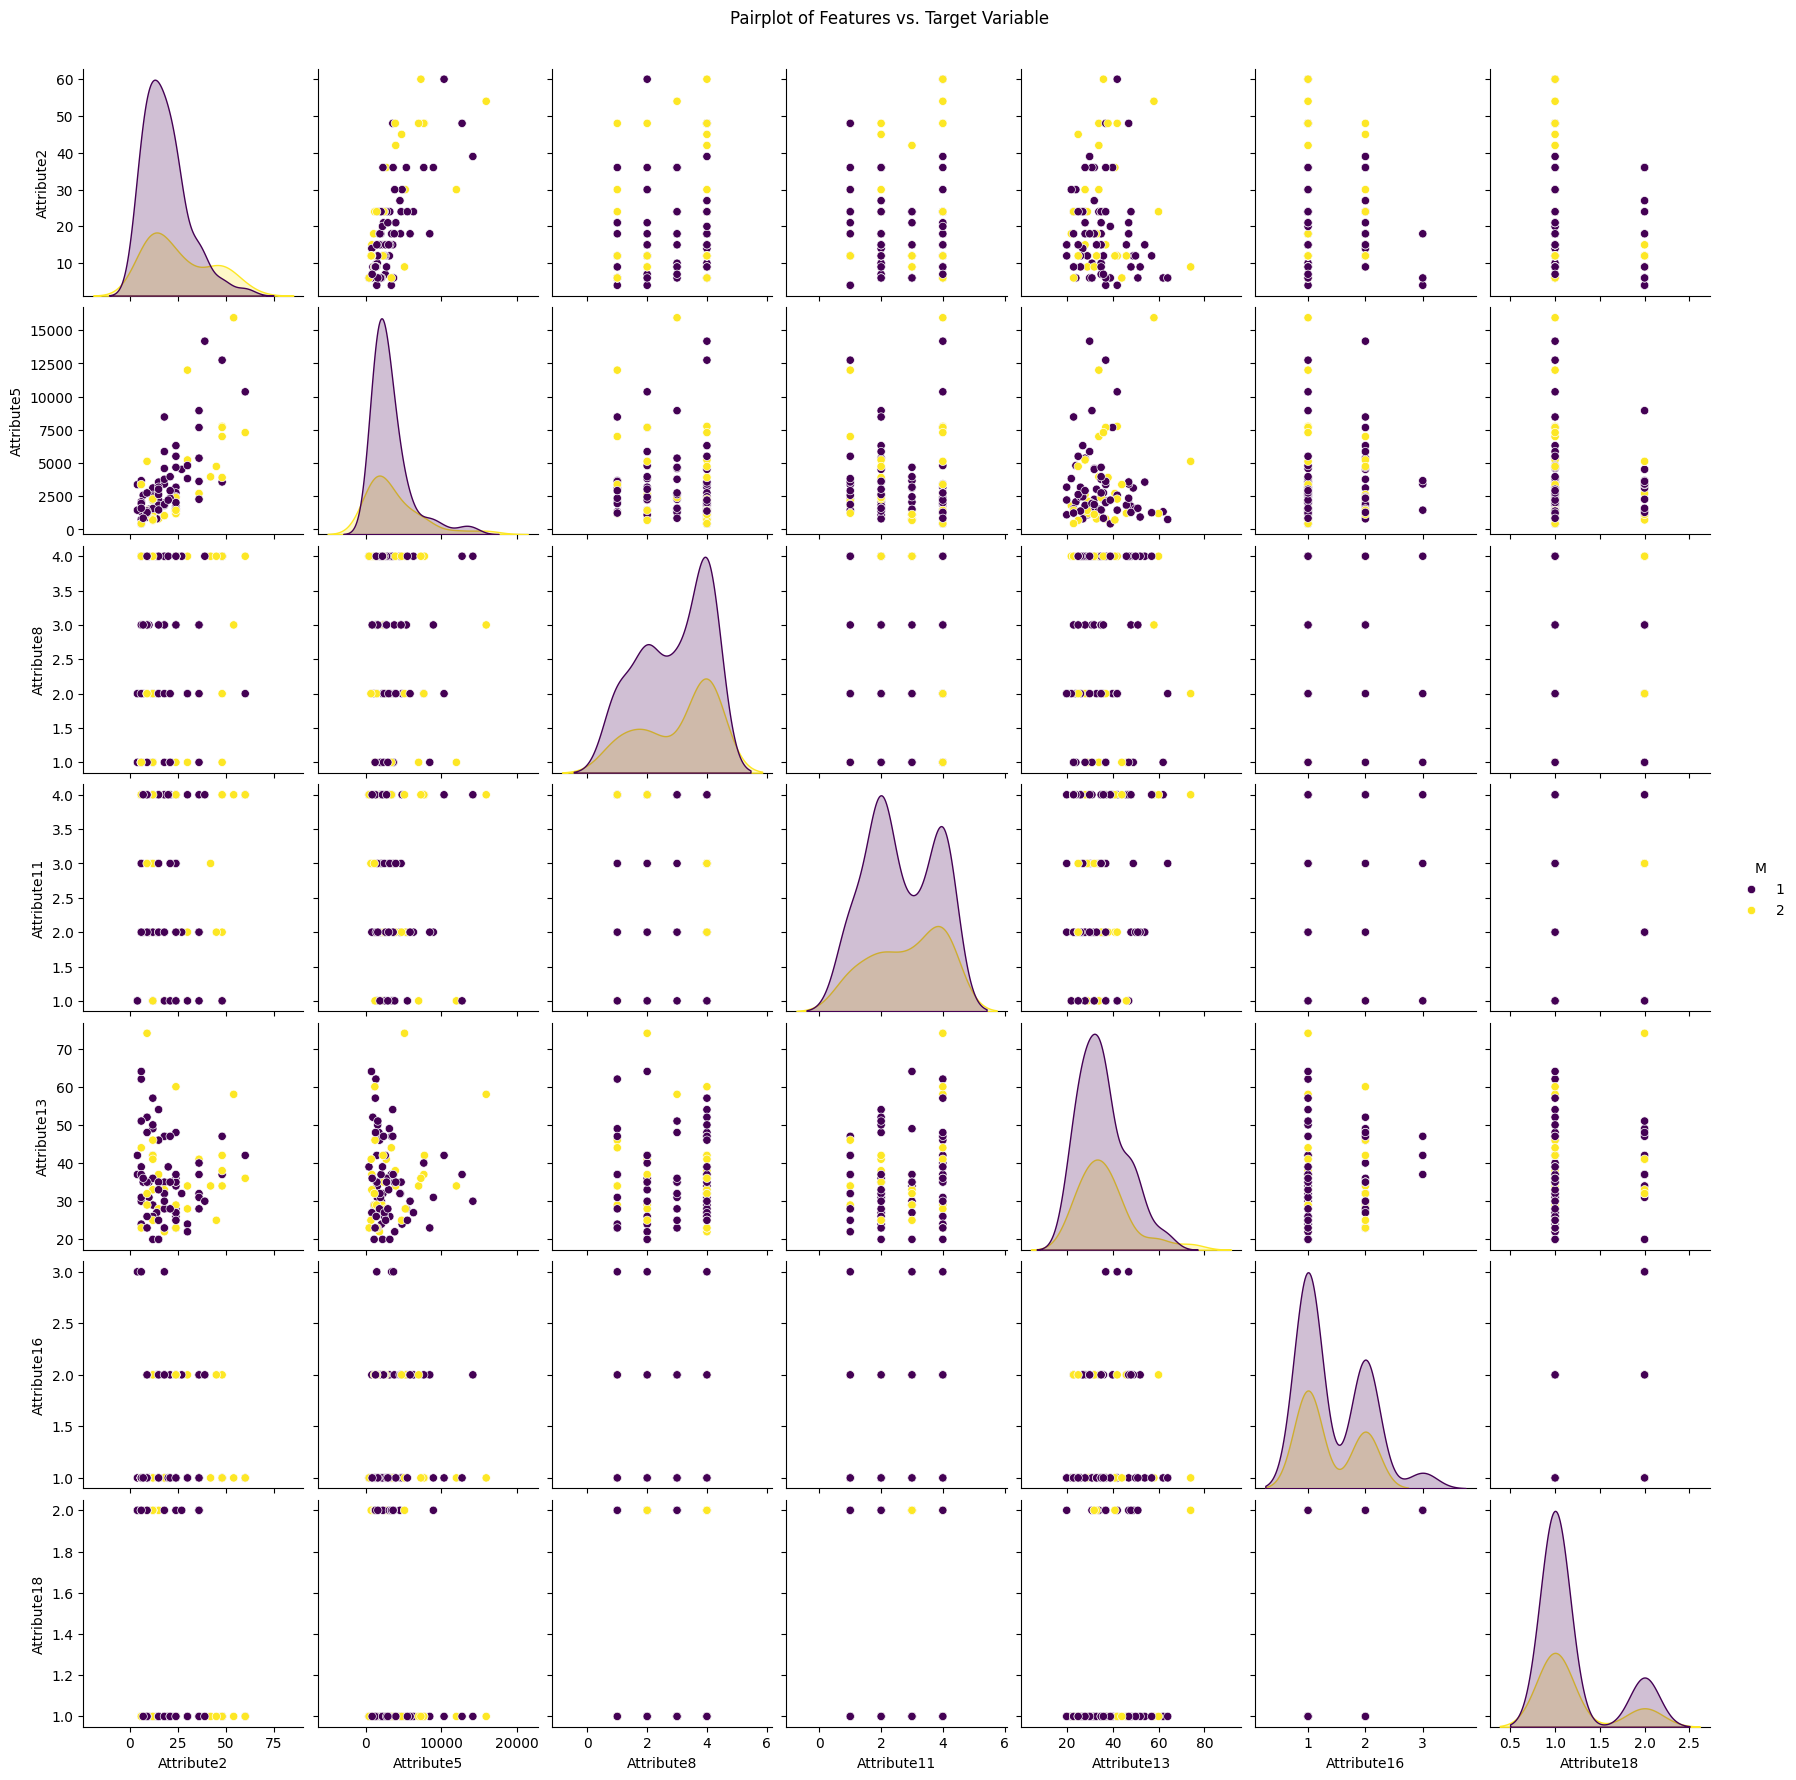

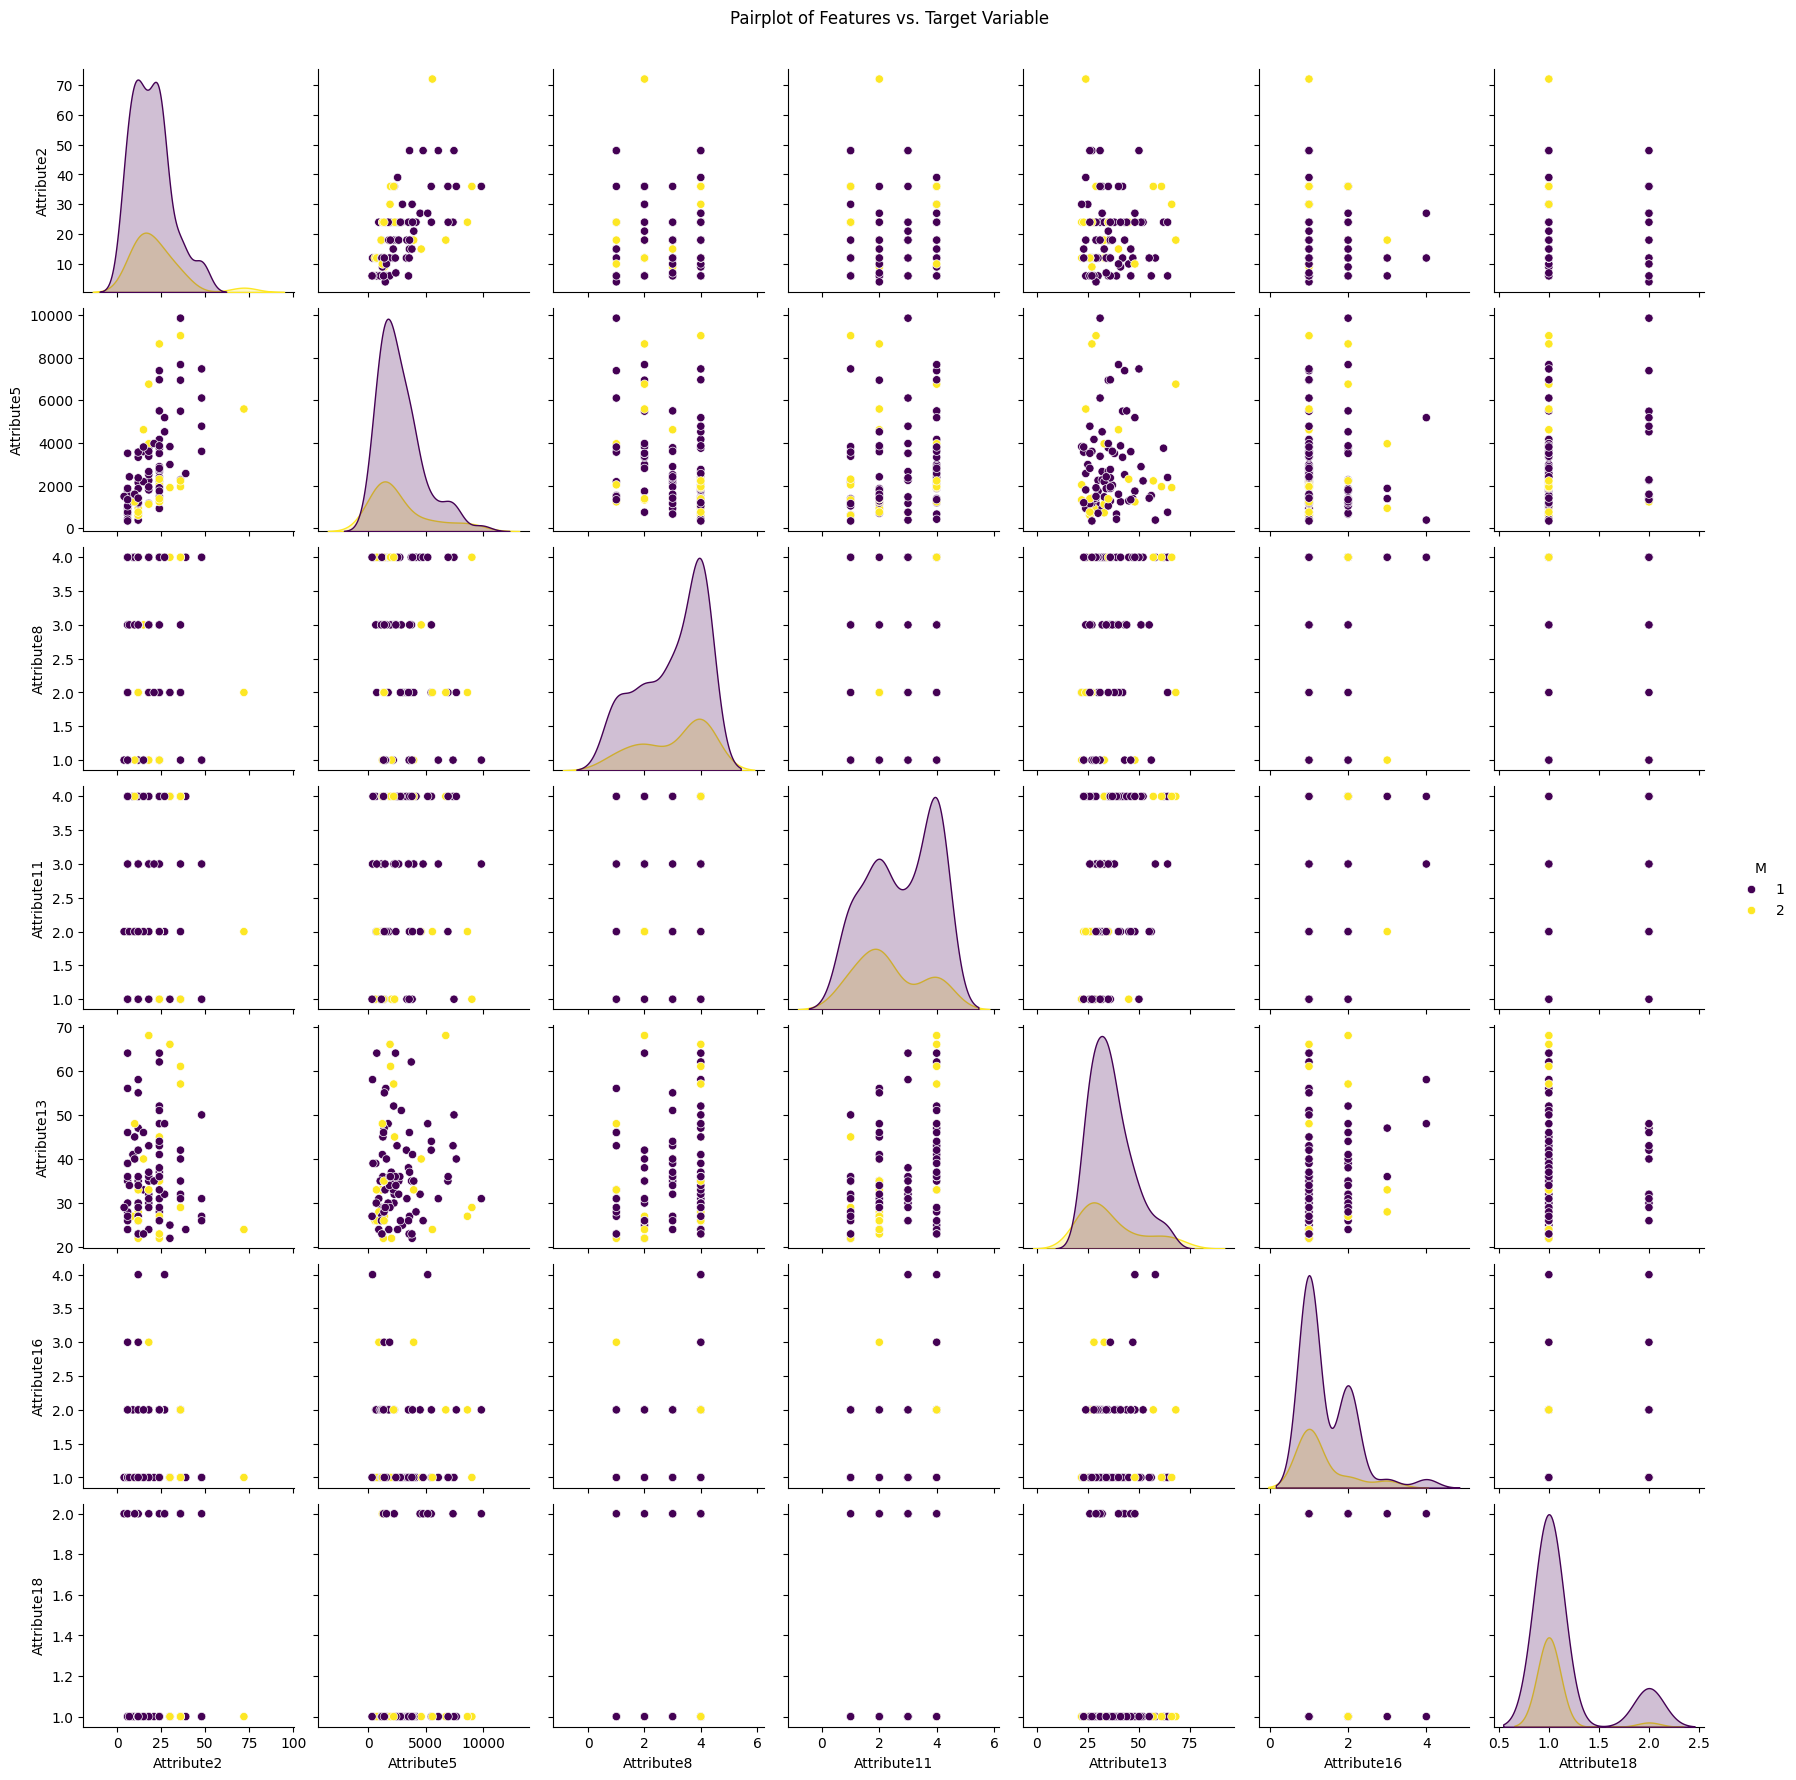

In [16]:
# Define a function to create pairplots for each subsample
def create_pairplot(subsample, target):
    sns.pairplot(subsample, hue=target, palette='viridis')
    plt.suptitle('Pairplot of Features vs. Target Variable', y=1.02)
    plt.show()

# Create pairplots for each subsample
for i in range(num_subsamples):
    subsample_indices = np.random.choice(df.index, size=subsample_size, replace=False)
    subsample = df.loc[subsample_indices]
    create_pairplot(subsample, target='M')

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<Figure size 1200x1000 with 0 Axes>

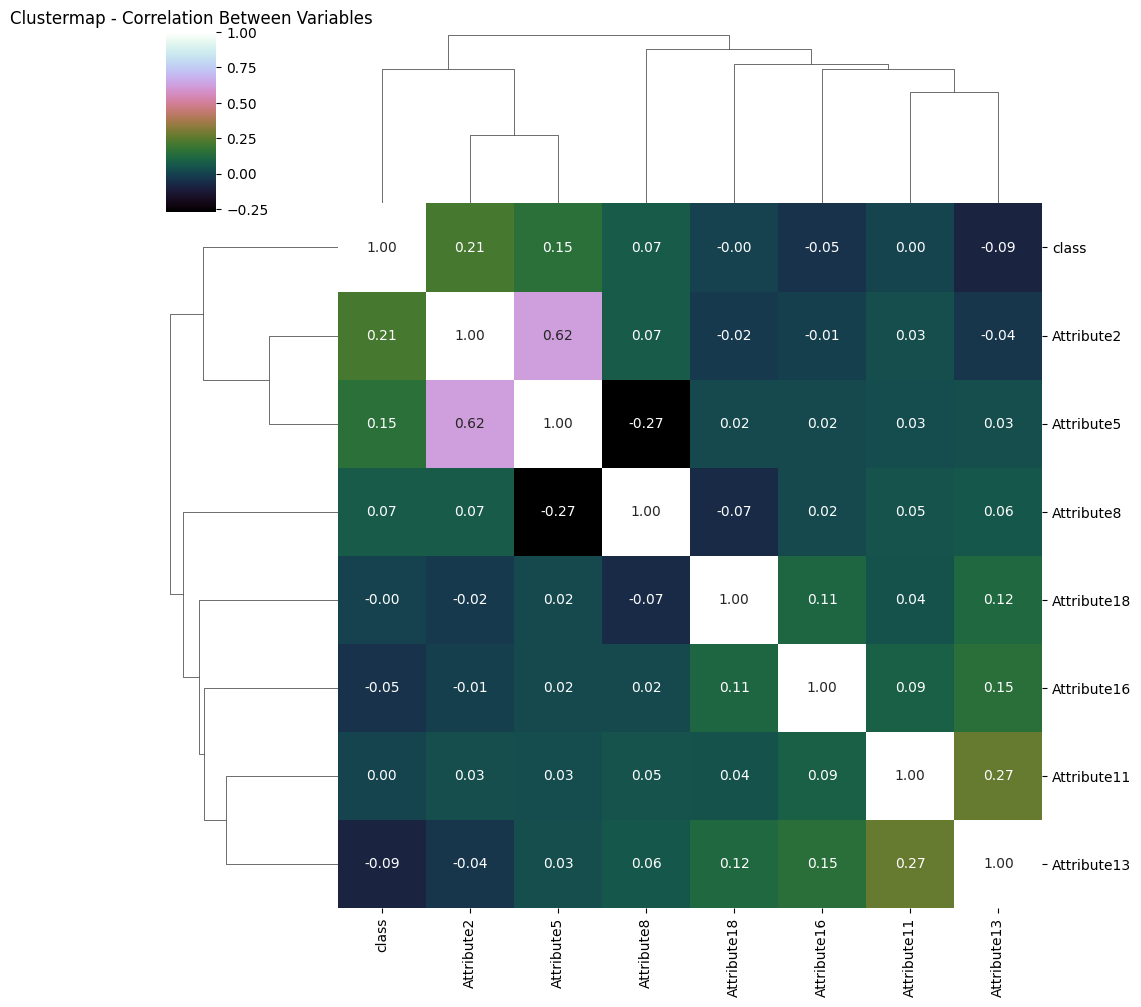

In [17]:
# Create a clustermap to explore relationships between variables
plt.figure(figsize=(12, 10))
sns.clustermap(df_numeric.corr(), cmap='cubehelix', annot=True, fmt=".2f")
plt.title('Clustermap - Correlation Between Variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [40]:
from sklearn.model_selection import train_test_split
y = df['M']
X = df.drop('M',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
a=X_train
b=y_train
c=X_test
svc_model = SVC()
svc_model.fit(a, b)

y_pred = svc_model.predict(c)

ValueError: could not convert string to float: 'A11'